In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
housing_prices_df_raw = pd.read_csv('../src/data/train.csv')
test_housing_prices_df_raw = pd.read_csv('../src/data/test.csv')

In [3]:
train_hdf = housing_prices_df_raw.copy()
test_hdf = test_housing_prices_df_raw.copy()
hdf = pd.concat([train_hdf, test_hdf], axis = 0, sort = False)

# Feature Selection/Data Wragling

In [4]:
ord_feat_num = ['OverallQual', 'OverallCond', 'BsmtFullBath', 
        'BsmtHalfBath', 'FullBath', 'HalfBath',
        'TotRmsAbvGrd', 'Fireplaces', 'BedroomAbvGr', 
        'KitchenAbvGr', 'GarageCars']

ord_feat_cat = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
        'HeatingQC', 'KitchenQual', 'FireplaceQu', 
        'GarageQual', 'GarageCond', 'PoolQC']

ord_feat = ord_feat_num + ord_feat_cat

nom_feat = ['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 
       'LandContour', 'Utilities', 'Neighborhood', 
       'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
       'Foundation', 'Heating', 'CentralAir', 'Electrical', 
       'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition', 
       'GarageFinish', 'PavedDrive', 'Fence', 'Functional', 
       'HouseStyle','LotConfig', 'Street', 'LandSlope']

cat_feat = nom_feat + ord_feat

cont_feat = ['LotFrontage', 'LotArea', 'YearBuilt', 
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 
       'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
       'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
       'MiscVal', 'MoSold', 'YrSold','BsmtUnfSF', 'GarageArea', 
       'LowQualFinSF', 'GrLivArea']

In [5]:
hdf['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

## Filling NA's

In [6]:
# hdf.loc[:,hdf.isnull().sum() > 0]
# hdf.isnull().sum()[hdf.isnull().sum() > 0]

In [7]:
# In percentage
print(hdf.shape)
round(100*hdf.isnull().sum()[hdf.isnull().sum() > 0]/len(hdf), 2)

(2919, 81)


MSZoning         0.14
LotFrontage     16.65
Alley           93.22
Utilities        0.07
Exterior1st      0.03
Exterior2nd      0.03
MasVnrType       0.82
MasVnrArea       0.79
BsmtQual         2.77
BsmtCond         2.81
BsmtExposure     2.81
BsmtFinType1     2.71
BsmtFinSF1       0.03
BsmtFinType2     2.74
BsmtFinSF2       0.03
BsmtUnfSF        0.03
TotalBsmtSF      0.03
Electrical       0.03
BsmtFullBath     0.07
BsmtHalfBath     0.07
KitchenQual      0.03
Functional       0.07
FireplaceQu     48.65
GarageType       5.38
GarageYrBlt      5.45
GarageFinish     5.45
GarageCars       0.03
GarageArea       0.03
GarageQual       5.45
GarageCond       5.45
PoolQC          99.66
Fence           80.44
MiscFeature     96.40
SaleType         0.03
SalePrice       49.98
dtype: float64

In [8]:
from scipy import stats


hdf[ord_feat_cat] = hdf[ord_feat_cat].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0})
hdf[['BsmtExposure']] = hdf[['BsmtExposure']].replace({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, np.nan: 0})
hdf[['BsmtFinType1', 'BsmtFinType2']] = hdf[['BsmtFinType1', 
                                             'BsmtFinType2']].replace({'GLQ': 6, 'ALQ': 5, 
                                                                       'BLQ': 4, 'Rec': 3, 
                                                                       'LwQ': 2, 'Unf': 1, 
                                                                       np.nan:0})
hdf[['Fence']] = hdf[['Fence']].replace({'MnPrv': 'HasFence', 
                                         'GdWo': 'HasFence', 
                                         'GdPrv': 'HasFence', 
                                         'MnWw': 'HasFence',
                                          np.nan: 'NoFence'})


# Inpute LotFrontage
a = hdf.groupby('Neighborhood')['LotFrontage'].agg('median')

hdf['LotFrontage'] = hdf.apply(lambda row: a.loc[row['Neighborhood']] if 
          np.isnan(row['LotFrontage']) else row['LotFrontage'], axis = 1)



for col in set(hdf.columns) - {'SalePrice'}:
    if hdf[col].dtype == 'object':
        hdf.fillna({col:stats.mode(hdf[col]).mode[0]}, inplace = True)
    else:
        hdf.fillna({col:np.median(hdf.loc[~hdf[col].isnull(), col])}, inplace = True)
        
        
# hdf.fillna({'PoolQC':}, inplace = True)
# hdf.fillna({'FireplaceQu':0}, inplace = True)
# hdf.fillna({'Alley':0}, inplace = True)
# hdf.fillna({gar:'NoGar' for gar in ['GarageFinish', 'GarageQual', 'GarageCond', 'GarageType']}, inplace=True)
# hdf.fillna({'GarageYrBlt':int(stats.mode(hdf['GarageYrBlt']).mode[0])}, inplace = True)
# hdf.fillna({bsmt:'NoBsmt' for bsmt in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']},
#             inplace = True)

In [9]:
round(100*hdf.isnull().sum()[hdf.isnull().sum() > 0]/len(hdf), 2)

SalePrice    49.98
dtype: float64

# Feature generation

In [10]:
hdf['remodeled'] = pd.Series([1 if a > 0 else 0 for a in (hdf['YearRemodAdd'] - hdf['YearBuilt'])])
hdf['TotalPorchAreasSF'] = hdf['OpenPorchSF'] + hdf['EnclosedPorch'] + hdf['3SsnPorch'] + hdf['ScreenPorch'] + \
                              hdf['WoodDeckSF']
hdf ['TotalBath'] = hdf['FullBath'] + hdf['BsmtFullBath'] + .5*(hdf['HalfBath'] + hdf['BsmtHalfBath'])
hdf['RestRooms'] = hdf['TotRmsAbvGrd'] - hdf['KitchenAbvGr'] - hdf['FullBath']

In [11]:
hdf.drop(columns = ['Utilities', 'Street', 'PoolQC'], inplace = True)
hdf.drop(columns = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], inplace = True) #there is totalbsmt
hdf.drop(columns = ['FullBath', 'BsmtFullBath', 'HalfBath','BsmtHalfBath'], inplace = True)
hdf.drop(columns = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'WoodDeckSF'], inplace = True)
hdf.drop(columns = 'MiscFeature', inplace = True) # drop feature (since price of feature is in miscval)
hdf.drop(columns = 'TotRmsAbvGrd', inplace = True)

In [12]:
cat_feat = set(cat_feat) - set(['MiscFeature', 'Utilities', 'Street', 
                                'FullBath', 'PoolQC', 'HalfBath', 'BsmtHalfBath', 
                                'BsmtFullBath', 'PoolQC', 'TotRmsAbvGrd'])

cont_feat = list(set(cont_feat) - set(['Utilities', 'Street', 'PoolQC'] +\
['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'] +\
['FullBath', 'BsmtFullBath', 'HalfBath','BsmtHalfBath'] +\
['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'WoodDeckSF'] +\
['MiscFeature', 'TotRmsAbvGrd']))


nom_feat = list(set(nom_feat) - set(['MiscFeature', 'Utilities', 'Street']))

# Train and test split/Remove outliers

In [55]:
# Dummify and Transforming prine to log price
X = pd.get_dummies(hdf, columns = nom_feat, drop_first=True)

X_train = X.loc[~X['SalePrice'].isnull(), :]


# #Removing Outliers
X_train = X_train.loc[(X_train['GrLivArea'] < 4000) & (X_train['LotArea'] < 100000) & (X_train['LotFrontage'] < 250),:]


y_train = np.log1p(X_train.loc[~X_train['SalePrice'].isnull(), 'SalePrice']) ## log price here!!

X_train.drop(columns = ['Id', 'SalePrice'], inplace = True)
X_test = X.loc[X['SalePrice'].isnull(), :].drop(columns = ['SalePrice'])

In [57]:
round(X_test.isnull().sum()[X_test.isnull().sum() > 0])

Series([], dtype: int64)

# Normalization of the columns if needed

In [56]:
# # Normalization. Use this one instead of the model option since we have to normalize the test dataset as well.
for col in X_train.columns:
    if np.std(X_train[col]) != 0:
        X_train[col] = (X_train[col] - np.mean(X_train[col]))/np.std(X_train[col], ddof=1)
    if np.std(X_test[col]) != 0:
        X_test[col] = (X_test[col] - np.mean(X_test[col]))/np.std(X_test[col], ddof=1)

# ------------------------------------------------------------------------------------------

# Initialize

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Drop columns with low variance/Not advised

In [16]:
vr = []
for col in X.columns:
    vr.append((np.var(X[col]), col))

In [17]:
X_LV = X.copy()
X_LV = X_LV.drop(columns = list(map(lambda x: x[1], filter(lambda x: x[0] > .8*(1-.8), vr))))

In [18]:
# Normalization
for col in X_LV.columns:
    X_LV[col] = (X_LV[col] - np.mean(X_LV[col]))/np.std(X_LV[col], ddof=1)

# Lasso feature selection

In [19]:
from sklearn.linear_model import Lasso
import seaborn as sns

In [20]:
lasso_lm = Lasso(max_iter=1e7, warm_start=True, normalize = True)

In [21]:
## Try this as well. takes a long time!
lasso_coefs = []
alphas      = np.logspace(-6, 1, 1000)

In [22]:
# lasso_coefs = []
# alphas      = np.logspace(-2, 0.5, 2)

In [23]:
for alpha in alphas:
    lasso_lm.set_params(alpha = alpha).fit(X_train, y_train)
    lasso_coefs.append(lasso_lm.coef_)

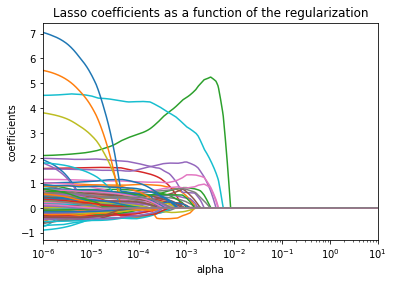

In [24]:
df_coef = pd.DataFrame(lasso_coefs, index=alphas, columns = X_train.columns)
title = 'Lasso coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title, legend = False)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()

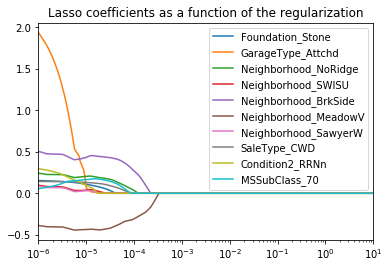

In [29]:
df_coef.iloc[:, np.random.choice(range(df_coef.shape[1]), size = 10, replace = False)].plot(logx=True, title=title)

In [26]:
coef_orders = []
for row in df_coef.index:
    coef_orders.extend([list(df_coef.loc[:,df_coef.loc[row, :] > 0.001].columns)])

In [27]:
last = []
s = 0
for i in sorted(np.unique(coef_orders), key = len):
    print (set(i) - set(last))
    s += len(set(i) - set(last))
    last = i


set()
{'OverallQual'}
{'GrLivArea'}
{'TotalBath'}
{'GarageCars'}
{'TotalBsmtSF'}
{'KitchenQual'}
{'GarageArea'}
{'YearBuilt'}
{'ExterQual'}
{'YearRemodAdd'}
{'1stFlrSF', 'FireplaceQu'}
{'LotArea'}
{'CentralAir_Y'}
{'BsmtFinType1', 'MSZoning_RL', 'Fireplaces'}
{'1stFlrSF'}
{'BsmtFinType1'}
{'HeatingQC'}
{'1stFlrSF', 'BsmtQual'}
{'TotalPorchAreasSF', 'OverallCond'}
{'BsmtExposure'}
{'Neighborhood_Crawfor'}
{'GarageQual'}
{'SaleType_New'}
{'LotFrontage'}
{'Foundation_PConc'}
{'Functional_Typ'}
{'PavedDrive_Y'}
{'Condition1_Norm'}
{'Neighborhood_NridgHt'}
{'Exterior1st_BrkFace', 'Neighborhood_StoneBr'}
{'MasVnrType_Stone'}
{'SaleCondition_Normal'}
{'LotConfig_CulDSac'}
{'MasVnrArea'}
{'Neighborhood_Somerst'}
{'BsmtQual'}
{'Neighborhood_Somerst', 'MSZoning_FV'}
{'Neighborhood_BrkSide'}
{'Neighborhood_Veenker', 'RestRooms'}
{'BsmtQual'}
{'Neighborhood_Veenker', 'Exterior1st_MetalSd'}
{'BsmtQual'}
{'Exterior1st_MetalSd'}
{'Heating_GasW'}
{'Neighborhood_NoRidge'}
{'Neighborhood_ClearCr'}
{'Sal

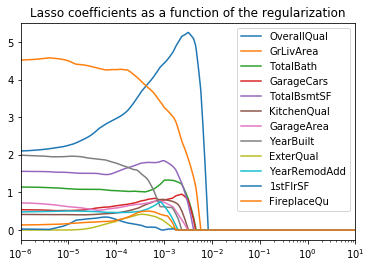

In [31]:
df_coef.loc[:, ['OverallQual','GrLivArea', 'TotalBath', 
                 'GarageCars', 'TotalBsmtSF','KitchenQual',
                 'GarageArea', 'YearBuilt', 'ExterQual',
                 'YearRemodAdd', '1stFlrSF', 'FireplaceQu']].plot(logx=True, title=title)

In [28]:
sorted(X_train['OverallQual'].unique())

[-3.710538370324534,
 -2.9811979239223527,
 -2.251857477520172,
 -1.5225170311179912,
 -0.7931765847158104,
 -0.06383613831362964,
 0.6655043080885511,
 1.3948447544907319,
 2.1241852008929127,
 2.8535256472950934]

In [68]:
# sns.pairplot(hdf[['YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'GarageArea']])

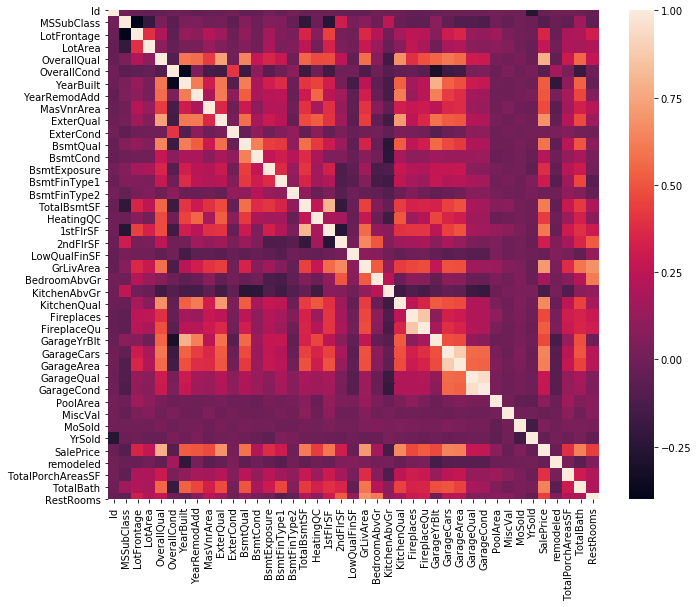

In [46]:
corr = hdf.corr()

f, ax = plt.subplots(figsize = (11,9))
sns.heatmap(corr)

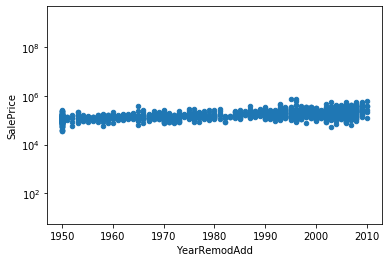

In [47]:
hdf.plot(kind = 'scatter', x = 'YearRemodAdd', y =  'SalePrice', logy = True)

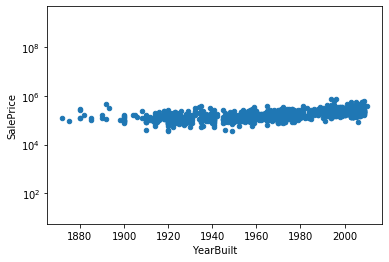

In [48]:
hdf.plot(kind = 'scatter', x = 'YearBuilt', y =  'SalePrice', logy = True)

# Grid search CV in lasso regression

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [72]:
lasso_gs = Lasso(max_iter = 1e7, warm_start = True, normalize = True)

In [ ]:
grid_params = [{'alpha': np.logspace(-6, -2, 1000)}]

In [ ]:
lasso_param_search = GridSearchCV(estimator = lasso_gs, 
                                  param_grid = grid_params, cv=10, 
                                  return_train_score=True,
                                  scoring='r2', verbose=2)

In [ ]:
lasso_param_search.fit(X_train, y_train)

In [ ]:
mean_test_score = lasso_param_search.cv_results_['mean_test_score']
std_test_score = lasso_param_search.cv_results_['std_test_score']
mean_train_score = lasso_param_search.cv_results_['mean_train_score']
std_train_score = lasso_param_search.cv_results_['std_train_score']

params = list(map(lambda s: s['alpha'], lasso_param_search.cv_results_['params']))

In [ ]:
lasso_vis_df = pd.DataFrame({'param': params, 'mean_test_score': mean_test_score,
                             'std_test_score': std_test_score, 
                             'mean_train_score':mean_train_score,
                             'std_train_score': std_train_score})

In [ ]:
lasso_vis_df.plot(x = 'param', y = ['mean_train_score', 'mean_test_score'])

In [36]:
lasso_gs2 = Lasso(max_iter = 1e7, warm_start = True)

In [43]:
grid_params2 = [{'alpha': np.linspace(0.002, 0.004, 1000)}]

In [44]:
lasso_param_search2 = GridSearchCV(estimator = lasso_gs2, 
                                  param_grid = grid_params2, cv=10, 
                                  return_train_score=True,
                                  scoring='r2', verbose=2)

In [45]:
lasso_param_search2.fit(X_train, y_train)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
[CV] alpha=0.002 .....................................................
[CV] ...................................... alpha=0.002, total=   0.0s
[CV] alpha=0.002 .....................................................
[CV] ...................................... alpha=0.002, total=   0.0s
[CV] alpha=0.002 .....................................................
[CV] ...................................... alpha=0.002, total=   0.0s
[CV] alpha=0.002 .....................................................
[CV] ...................................... alpha=0.002, total=   0.0s
[CV] alpha=0.002 .....................................................
[CV] ...................................... alpha=0.002, total=   0.0s
[CV] alpha=0.002 .....................................................
[CV] ...................................... alpha=0.002, total=   0.0s
[CV] alpha=0.002 .....................................................
[CV] .....

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... alpha=0.002002002002002002, total=   0.0s
[CV] alpha=0.002002002002002002 ......................................
[CV] ....................... alpha=0.002002002002002002, total=   0.0s
[CV] alpha=0.002002002002002002 ......................................
[CV] ....................... alpha=0.002002002002002002, total=   0.0s
[CV] alpha=0.002002002002002002 ......................................
[CV] ....................... alpha=0.002002002002002002, total=   0.0s
[CV] alpha=0.002002002002002002 ......................................
[CV] ....................... alpha=0.002002002002002002, total=   0.0s
[CV] alpha=0.002002002002002002 ......................................
[CV] ....................... alpha=0.002002002002002002, total=   0.0s
[CV] alpha=0.002002002002002002 ......................................
[CV] ....................... alpha=0.002002002002002002, total=   0.0s
[CV] alpha=0.002002002002002002 ......................................
[CV] .

[CV] ....................... alpha=0.002014014014014014, total=   0.0s
[CV] alpha=0.002014014014014014 ......................................
[CV] ....................... alpha=0.002014014014014014, total=   0.0s
[CV] alpha=0.002014014014014014 ......................................
[CV] ....................... alpha=0.002014014014014014, total=   0.0s
[CV] alpha=0.002014014014014014 ......................................
[CV] ....................... alpha=0.002014014014014014, total=   0.0s
[CV] alpha=0.002014014014014014 ......................................
[CV] ....................... alpha=0.002014014014014014, total=   0.0s
[CV] alpha=0.002014014014014014 ......................................
[CV] ....................... alpha=0.002014014014014014, total=   0.0s
[CV] alpha=0.002014014014014014 ......................................
[CV] ....................... alpha=0.002014014014014014, total=   0.0s
[CV] alpha=0.002014014014014014 ......................................
[CV] .

[CV] ....................... alpha=0.002026026026026026, total=   0.0s
[CV] alpha=0.002026026026026026 ......................................
[CV] ....................... alpha=0.002026026026026026, total=   0.0s
[CV] alpha=0.002026026026026026 ......................................
[CV] ....................... alpha=0.002026026026026026, total=   0.0s
[CV] alpha=0.002026026026026026 ......................................
[CV] ....................... alpha=0.002026026026026026, total=   0.0s
[CV] alpha=0.002026026026026026 ......................................
[CV] ....................... alpha=0.002026026026026026, total=   0.0s
[CV] alpha=0.002026026026026026 ......................................
[CV] ....................... alpha=0.002026026026026026, total=   0.0s
[CV] alpha=0.002028028028028028 ......................................
[CV] ....................... alpha=0.002028028028028028, total=   0.0s
[CV] alpha=0.002028028028028028 ......................................
[CV] .

[CV] ...................... alpha=0.0020380380380380383, total=   0.0s
[CV] alpha=0.0020380380380380383 .....................................
[CV] ...................... alpha=0.0020380380380380383, total=   0.0s
[CV] alpha=0.0020380380380380383 .....................................
[CV] ...................... alpha=0.0020380380380380383, total=   0.0s
[CV] alpha=0.0020380380380380383 .....................................
[CV] ...................... alpha=0.0020380380380380383, total=   0.0s
[CV] alpha=0.00204004004004004 .......................................
[CV] ........................ alpha=0.00204004004004004, total=   0.0s
[CV] alpha=0.00204004004004004 .......................................
[CV] ........................ alpha=0.00204004004004004, total=   0.0s
[CV] alpha=0.00204004004004004 .......................................
[CV] ........................ alpha=0.00204004004004004, total=   0.0s
[CV] alpha=0.00204004004004004 .......................................
[CV] .

[CV] ...................... alpha=0.0020520520520520523, total=   0.0s
[CV] alpha=0.0020520520520520523 .....................................
[CV] ...................... alpha=0.0020520520520520523, total=   0.0s
[CV] alpha=0.0020520520520520523 .....................................
[CV] ...................... alpha=0.0020520520520520523, total=   0.0s
[CV] alpha=0.0020520520520520523 .....................................
[CV] ...................... alpha=0.0020520520520520523, total=   0.0s
[CV] alpha=0.0020520520520520523 .....................................
[CV] ...................... alpha=0.0020520520520520523, total=   0.0s
[CV] alpha=0.0020520520520520523 .....................................
[CV] ...................... alpha=0.0020520520520520523, total=   0.0s
[CV] alpha=0.0020520520520520523 .....................................
[CV] ...................... alpha=0.0020520520520520523, total=   0.0s
[CV] alpha=0.0020540540540540542 .....................................
[CV] .

[CV] ....................... alpha=0.002064064064064064, total=   0.0s
[CV] alpha=0.002064064064064064 ......................................
[CV] ....................... alpha=0.002064064064064064, total=   0.0s
[CV] alpha=0.002064064064064064 ......................................
[CV] ....................... alpha=0.002064064064064064, total=   0.0s
[CV] alpha=0.002064064064064064 ......................................
[CV] ....................... alpha=0.002064064064064064, total=   0.0s
[CV] alpha=0.002064064064064064 ......................................
[CV] ....................... alpha=0.002064064064064064, total=   0.0s
[CV] alpha=0.002064064064064064 ......................................
[CV] ....................... alpha=0.002064064064064064, total=   0.0s
[CV] alpha=0.002064064064064064 ......................................
[CV] ....................... alpha=0.002064064064064064, total=   0.0s
[CV] alpha=0.002064064064064064 ......................................
[CV] .

[CV] ....................... alpha=0.002076076076076076, total=   0.0s
[CV] alpha=0.002076076076076076 ......................................
[CV] ....................... alpha=0.002076076076076076, total=   0.0s
[CV] alpha=0.002076076076076076 ......................................
[CV] ....................... alpha=0.002076076076076076, total=   0.0s
[CV] alpha=0.002076076076076076 ......................................
[CV] ....................... alpha=0.002076076076076076, total=   0.0s
[CV] alpha=0.002076076076076076 ......................................
[CV] ....................... alpha=0.002076076076076076, total=   0.0s
[CV] alpha=0.002076076076076076 ......................................
[CV] ....................... alpha=0.002076076076076076, total=   0.0s
[CV] alpha=0.002078078078078078 ......................................
[CV] ....................... alpha=0.002078078078078078, total=   0.0s
[CV] alpha=0.002078078078078078 ......................................
[CV] .

[CV] ........................ alpha=0.00209009009009009, total=   0.0s
[CV] alpha=0.00209009009009009 .......................................
[CV] ........................ alpha=0.00209009009009009, total=   0.0s
[CV] alpha=0.00209009009009009 .......................................
[CV] ........................ alpha=0.00209009009009009, total=   0.0s
[CV] alpha=0.00209009009009009 .......................................
[CV] ........................ alpha=0.00209009009009009, total=   0.0s
[CV] alpha=0.00209009009009009 .......................................
[CV] ........................ alpha=0.00209009009009009, total=   0.0s
[CV] alpha=0.00209009009009009 .......................................
[CV] ........................ alpha=0.00209009009009009, total=   0.0s
[CV] alpha=0.00209009009009009 .......................................
[CV] ........................ alpha=0.00209009009009009, total=   0.0s
[CV] alpha=0.002092092092092092 ......................................
[CV] .

[CV] ....................... alpha=0.002104104104104104, total=   0.0s
[CV] alpha=0.002104104104104104 ......................................
[CV] ....................... alpha=0.002104104104104104, total=   0.0s
[CV] alpha=0.002104104104104104 ......................................
[CV] ....................... alpha=0.002104104104104104, total=   0.0s
[CV] alpha=0.002104104104104104 ......................................
[CV] ....................... alpha=0.002104104104104104, total=   0.0s
[CV] alpha=0.002104104104104104 ......................................
[CV] ....................... alpha=0.002104104104104104, total=   0.0s
[CV] alpha=0.002104104104104104 ......................................
[CV] ....................... alpha=0.002104104104104104, total=   0.0s
[CV] alpha=0.002106106106106106 ......................................
[CV] ....................... alpha=0.002106106106106106, total=   0.0s
[CV] alpha=0.002106106106106106 ......................................
[CV] .

[CV] ....................... alpha=0.002118118118118118, total=   0.0s
[CV] alpha=0.002118118118118118 ......................................
[CV] ....................... alpha=0.002118118118118118, total=   0.0s
[CV] alpha=0.002118118118118118 ......................................
[CV] ....................... alpha=0.002118118118118118, total=   0.0s
[CV] alpha=0.002118118118118118 ......................................
[CV] ....................... alpha=0.002118118118118118, total=   0.0s
[CV] alpha=0.002118118118118118 ......................................
[CV] ....................... alpha=0.002118118118118118, total=   0.0s
[CV] alpha=0.002118118118118118 ......................................
[CV] ....................... alpha=0.002118118118118118, total=   0.0s
[CV] alpha=0.00212012012012012 .......................................
[CV] ........................ alpha=0.00212012012012012, total=   0.0s
[CV] alpha=0.00212012012012012 .......................................
[CV] .

[CV] ....................... alpha=0.002132132132132132, total=   0.0s
[CV] alpha=0.002132132132132132 ......................................
[CV] ....................... alpha=0.002132132132132132, total=   0.0s
[CV] alpha=0.002132132132132132 ......................................
[CV] ....................... alpha=0.002132132132132132, total=   0.0s
[CV] alpha=0.002132132132132132 ......................................
[CV] ....................... alpha=0.002132132132132132, total=   0.0s
[CV] alpha=0.002132132132132132 ......................................
[CV] ....................... alpha=0.002132132132132132, total=   0.0s
[CV] alpha=0.002132132132132132 ......................................
[CV] ....................... alpha=0.002132132132132132, total=   0.0s
[CV] alpha=0.002134134134134134 ......................................
[CV] ....................... alpha=0.002134134134134134, total=   0.0s
[CV] alpha=0.002134134134134134 ......................................
[CV] .

[CV] ...................... alpha=0.0021461461461461462, total=   0.0s
[CV] alpha=0.0021461461461461462 .....................................
[CV] ...................... alpha=0.0021461461461461462, total=   0.0s
[CV] alpha=0.0021461461461461462 .....................................
[CV] ...................... alpha=0.0021461461461461462, total=   0.0s
[CV] alpha=0.0021461461461461462 .....................................
[CV] ...................... alpha=0.0021461461461461462, total=   0.0s
[CV] alpha=0.002148148148148148 ......................................
[CV] ....................... alpha=0.002148148148148148, total=   0.0s
[CV] alpha=0.002148148148148148 ......................................
[CV] ....................... alpha=0.002148148148148148, total=   0.0s
[CV] alpha=0.002148148148148148 ......................................
[CV] ....................... alpha=0.002148148148148148, total=   0.0s
[CV] alpha=0.002148148148148148 ......................................
[CV] .

[CV] ...................... alpha=0.0021601601601601603, total=   0.0s
[CV] alpha=0.0021601601601601603 .....................................
[CV] ...................... alpha=0.0021601601601601603, total=   0.0s
[CV] alpha=0.0021601601601601603 .....................................
[CV] ...................... alpha=0.0021601601601601603, total=   0.0s
[CV] alpha=0.0021601601601601603 .....................................
[CV] ...................... alpha=0.0021601601601601603, total=   0.0s
[CV] alpha=0.0021601601601601603 .....................................
[CV] ...................... alpha=0.0021601601601601603, total=   0.0s
[CV] alpha=0.0021601601601601603 .....................................
[CV] ...................... alpha=0.0021601601601601603, total=   0.0s
[CV] alpha=0.002162162162162162 ......................................
[CV] ....................... alpha=0.002162162162162162, total=   0.0s
[CV] alpha=0.002162162162162162 ......................................
[CV] .

[CV] ...................... alpha=0.0021741741741741743, total=   0.0s
[CV] alpha=0.0021741741741741743 .....................................
[CV] ...................... alpha=0.0021741741741741743, total=   0.0s
[CV] alpha=0.0021741741741741743 .....................................
[CV] ...................... alpha=0.0021741741741741743, total=   0.0s
[CV] alpha=0.0021741741741741743 .....................................
[CV] ...................... alpha=0.0021741741741741743, total=   0.0s
[CV] alpha=0.0021741741741741743 .....................................
[CV] ...................... alpha=0.0021741741741741743, total=   0.0s
[CV] alpha=0.0021741741741741743 .....................................
[CV] ...................... alpha=0.0021741741741741743, total=   0.0s
[CV] alpha=0.0021741741741741743 .....................................
[CV] ...................... alpha=0.0021741741741741743, total=   0.0s
[CV] alpha=0.0021741741741741743 .....................................
[CV] .

[CV] ...................... alpha=0.0021881881881881883, total=   0.0s
[CV] alpha=0.0021881881881881883 .....................................
[CV] ...................... alpha=0.0021881881881881883, total=   0.0s
[CV] alpha=0.0021881881881881883 .....................................
[CV] ...................... alpha=0.0021881881881881883, total=   0.0s
[CV] alpha=0.0021881881881881883 .....................................
[CV] ...................... alpha=0.0021881881881881883, total=   0.0s
[CV] alpha=0.0021881881881881883 .....................................
[CV] ...................... alpha=0.0021881881881881883, total=   0.0s
[CV] alpha=0.0021881881881881883 .....................................
[CV] ...................... alpha=0.0021881881881881883, total=   0.0s
[CV] alpha=0.0021881881881881883 .....................................
[CV] ...................... alpha=0.0021881881881881883, total=   0.0s
[CV] alpha=0.0021881881881881883 .....................................
[CV] .

[CV] ...................... alpha=0.0022022022022022024, total=   0.0s
[CV] alpha=0.0022022022022022024 .....................................
[CV] ...................... alpha=0.0022022022022022024, total=   0.0s
[CV] alpha=0.0022022022022022024 .....................................
[CV] ...................... alpha=0.0022022022022022024, total=   0.0s
[CV] alpha=0.0022022022022022024 .....................................
[CV] ...................... alpha=0.0022022022022022024, total=   0.0s
[CV] alpha=0.0022022022022022024 .....................................
[CV] ...................... alpha=0.0022022022022022024, total=   0.0s
[CV] alpha=0.0022022022022022024 .....................................
[CV] ...................... alpha=0.0022022022022022024, total=   0.0s
[CV] alpha=0.0022042042042042043 .....................................
[CV] ...................... alpha=0.0022042042042042043, total=   0.0s
[CV] alpha=0.0022042042042042043 .....................................
[CV] .

[CV] ....................... alpha=0.002214214214214214, total=   0.0s
[CV] alpha=0.002214214214214214 ......................................
[CV] ....................... alpha=0.002214214214214214, total=   0.0s
[CV] alpha=0.002214214214214214 ......................................
[CV] ....................... alpha=0.002214214214214214, total=   0.0s
[CV] alpha=0.002214214214214214 ......................................
[CV] ....................... alpha=0.002214214214214214, total=   0.0s
[CV] alpha=0.002214214214214214 ......................................
[CV] ....................... alpha=0.002214214214214214, total=   0.0s
[CV] alpha=0.002214214214214214 ......................................
[CV] ....................... alpha=0.002214214214214214, total=   0.0s
[CV] alpha=0.002214214214214214 ......................................
[CV] ....................... alpha=0.002214214214214214, total=   0.0s
[CV] alpha=0.0022162162162162164 .....................................
[CV] .

[CV] ....................... alpha=0.002226226226226226, total=   0.0s
[CV] alpha=0.002226226226226226 ......................................
[CV] ....................... alpha=0.002226226226226226, total=   0.0s
[CV] alpha=0.002226226226226226 ......................................
[CV] ....................... alpha=0.002226226226226226, total=   0.0s
[CV] alpha=0.002226226226226226 ......................................
[CV] ....................... alpha=0.002226226226226226, total=   0.0s
[CV] alpha=0.002226226226226226 ......................................
[CV] ....................... alpha=0.002226226226226226, total=   0.0s
[CV] alpha=0.002226226226226226 ......................................
[CV] ....................... alpha=0.002226226226226226, total=   0.0s
[CV] alpha=0.002226226226226226 ......................................
[CV] ....................... alpha=0.002226226226226226, total=   0.0s
[CV] alpha=0.002226226226226226 ......................................
[CV] .

[CV] ....................... alpha=0.002238238238238238, total=   0.0s
[CV] alpha=0.002238238238238238 ......................................
[CV] ....................... alpha=0.002238238238238238, total=   0.0s
[CV] alpha=0.002238238238238238 ......................................
[CV] ....................... alpha=0.002238238238238238, total=   0.0s
[CV] alpha=0.002238238238238238 ......................................
[CV] ....................... alpha=0.002238238238238238, total=   0.0s
[CV] alpha=0.002238238238238238 ......................................
[CV] ....................... alpha=0.002238238238238238, total=   0.0s
[CV] alpha=0.002238238238238238 ......................................
[CV] ....................... alpha=0.002238238238238238, total=   0.0s
[CV] alpha=0.002238238238238238 ......................................
[CV] ....................... alpha=0.002238238238238238, total=   0.0s
[CV] alpha=0.002238238238238238 ......................................
[CV] .

[CV] ...................... alpha=0.0022502502502502503, total=   0.0s
[CV] alpha=0.0022502502502502503 .....................................
[CV] ...................... alpha=0.0022502502502502503, total=   0.0s
[CV] alpha=0.0022502502502502503 .....................................
[CV] ...................... alpha=0.0022502502502502503, total=   0.0s
[CV] alpha=0.0022502502502502503 .....................................
[CV] ...................... alpha=0.0022502502502502503, total=   0.0s
[CV] alpha=0.0022502502502502503 .....................................
[CV] ...................... alpha=0.0022502502502502503, total=   0.0s
[CV] alpha=0.0022502502502502503 .....................................
[CV] ...................... alpha=0.0022502502502502503, total=   0.0s
[CV] alpha=0.0022502502502502503 .....................................
[CV] ...................... alpha=0.0022502502502502503, total=   0.0s
[CV] alpha=0.0022502502502502503 .....................................
[CV] .

[CV] ...................... alpha=0.0022602602602602604, total=   0.0s
[CV] alpha=0.0022622622622622624 .....................................
[CV] ...................... alpha=0.0022622622622622624, total=   0.0s
[CV] alpha=0.0022622622622622624 .....................................
[CV] ...................... alpha=0.0022622622622622624, total=   0.0s
[CV] alpha=0.0022622622622622624 .....................................
[CV] ...................... alpha=0.0022622622622622624, total=   0.0s
[CV] alpha=0.0022622622622622624 .....................................
[CV] ...................... alpha=0.0022622622622622624, total=   0.0s
[CV] alpha=0.0022622622622622624 .....................................
[CV] ...................... alpha=0.0022622622622622624, total=   0.0s
[CV] alpha=0.0022622622622622624 .....................................
[CV] ...................... alpha=0.0022622622622622624, total=   0.0s
[CV] alpha=0.0022622622622622624 .....................................
[CV] .

[CV] ....................... alpha=0.002272272272272272, total=   0.0s
[CV] alpha=0.0022742742742742745 .....................................
[CV] ...................... alpha=0.0022742742742742745, total=   0.0s
[CV] alpha=0.0022742742742742745 .....................................
[CV] ...................... alpha=0.0022742742742742745, total=   0.0s
[CV] alpha=0.0022742742742742745 .....................................
[CV] ...................... alpha=0.0022742742742742745, total=   0.0s
[CV] alpha=0.0022742742742742745 .....................................
[CV] ...................... alpha=0.0022742742742742745, total=   0.0s
[CV] alpha=0.0022742742742742745 .....................................
[CV] ...................... alpha=0.0022742742742742745, total=   0.0s
[CV] alpha=0.0022742742742742745 .....................................
[CV] ...................... alpha=0.0022742742742742745, total=   0.0s
[CV] alpha=0.0022742742742742745 .....................................
[CV] .

[CV] ....................... alpha=0.002284284284284284, total=   0.0s
[CV] alpha=0.002286286286286286 ......................................
[CV] ....................... alpha=0.002286286286286286, total=   0.0s
[CV] alpha=0.002286286286286286 ......................................
[CV] ....................... alpha=0.002286286286286286, total=   0.0s
[CV] alpha=0.002286286286286286 ......................................
[CV] ....................... alpha=0.002286286286286286, total=   0.0s
[CV] alpha=0.002286286286286286 ......................................
[CV] ....................... alpha=0.002286286286286286, total=   0.0s
[CV] alpha=0.002286286286286286 ......................................
[CV] ....................... alpha=0.002286286286286286, total=   0.0s
[CV] alpha=0.002286286286286286 ......................................
[CV] ....................... alpha=0.002286286286286286, total=   0.0s
[CV] alpha=0.002286286286286286 ......................................
[CV] .

[CV] ......................... alpha=0.0023003003003003, total=   0.0s
[CV] alpha=0.0023003003003003 ........................................
[CV] ......................... alpha=0.0023003003003003, total=   0.0s
[CV] alpha=0.0023003003003003 ........................................
[CV] ......................... alpha=0.0023003003003003, total=   0.0s
[CV] alpha=0.0023003003003003 ........................................
[CV] ......................... alpha=0.0023003003003003, total=   0.0s
[CV] alpha=0.0023003003003003 ........................................
[CV] ......................... alpha=0.0023003003003003, total=   0.0s
[CV] alpha=0.0023003003003003 ........................................
[CV] ......................... alpha=0.0023003003003003, total=   0.0s
[CV] alpha=0.0023003003003003 ........................................
[CV] ......................... alpha=0.0023003003003003, total=   0.0s
[CV] alpha=0.0023003003003003 ........................................
[CV] .

[CV] ...................... alpha=0.0023103103103103103, total=   0.0s
[CV] alpha=0.0023123123123123123 .....................................
[CV] ...................... alpha=0.0023123123123123123, total=   0.0s
[CV] alpha=0.0023123123123123123 .....................................
[CV] ...................... alpha=0.0023123123123123123, total=   0.0s
[CV] alpha=0.0023123123123123123 .....................................
[CV] ...................... alpha=0.0023123123123123123, total=   0.0s
[CV] alpha=0.0023123123123123123 .....................................
[CV] ...................... alpha=0.0023123123123123123, total=   0.0s
[CV] alpha=0.0023123123123123123 .....................................
[CV] ...................... alpha=0.0023123123123123123, total=   0.0s
[CV] alpha=0.0023123123123123123 .....................................
[CV] ...................... alpha=0.0023123123123123123, total=   0.0s
[CV] alpha=0.0023123123123123123 .....................................
[CV] .

[CV] ...................... alpha=0.0023263263263263263, total=   0.0s
[CV] alpha=0.0023263263263263263 .....................................
[CV] ...................... alpha=0.0023263263263263263, total=   0.0s
[CV] alpha=0.0023263263263263263 .....................................
[CV] ...................... alpha=0.0023263263263263263, total=   0.0s
[CV] alpha=0.0023263263263263263 .....................................
[CV] ...................... alpha=0.0023263263263263263, total=   0.0s
[CV] alpha=0.0023263263263263263 .....................................
[CV] ...................... alpha=0.0023263263263263263, total=   0.0s
[CV] alpha=0.0023263263263263263 .....................................
[CV] ...................... alpha=0.0023263263263263263, total=   0.0s
[CV] alpha=0.0023263263263263263 .....................................
[CV] ...................... alpha=0.0023263263263263263, total=   0.0s
[CV] alpha=0.0023263263263263263 .....................................
[CV] .

[CV] ...................... alpha=0.0023363363363363364, total=   0.0s
[CV] alpha=0.0023383383383383384 .....................................
[CV] ...................... alpha=0.0023383383383383384, total=   0.0s
[CV] alpha=0.0023383383383383384 .....................................
[CV] ...................... alpha=0.0023383383383383384, total=   0.0s
[CV] alpha=0.0023383383383383384 .....................................
[CV] ...................... alpha=0.0023383383383383384, total=   0.0s
[CV] alpha=0.0023383383383383384 .....................................
[CV] ...................... alpha=0.0023383383383383384, total=   0.0s
[CV] alpha=0.0023383383383383384 .....................................
[CV] ...................... alpha=0.0023383383383383384, total=   0.0s
[CV] alpha=0.0023383383383383384 .....................................
[CV] ...................... alpha=0.0023383383383383384, total=   0.0s
[CV] alpha=0.0023383383383383384 .....................................
[CV] .

[CV] ...................... alpha=0.0023483483483483485, total=   0.0s
[CV] alpha=0.0023503503503503505 .....................................
[CV] ...................... alpha=0.0023503503503503505, total=   0.0s
[CV] alpha=0.0023503503503503505 .....................................
[CV] ...................... alpha=0.0023503503503503505, total=   0.0s
[CV] alpha=0.0023503503503503505 .....................................
[CV] ...................... alpha=0.0023503503503503505, total=   0.0s
[CV] alpha=0.0023503503503503505 .....................................
[CV] ...................... alpha=0.0023503503503503505, total=   0.0s
[CV] alpha=0.0023503503503503505 .....................................
[CV] ...................... alpha=0.0023503503503503505, total=   0.0s
[CV] alpha=0.0023503503503503505 .....................................
[CV] ...................... alpha=0.0023503503503503505, total=   0.0s
[CV] alpha=0.0023503503503503505 .....................................
[CV] .

[CV] ........................ alpha=0.00236036036036036, total=   0.0s
[CV] alpha=0.0023623623623623626 .....................................
[CV] ...................... alpha=0.0023623623623623626, total=   0.0s
[CV] alpha=0.0023623623623623626 .....................................
[CV] ...................... alpha=0.0023623623623623626, total=   0.0s
[CV] alpha=0.0023623623623623626 .....................................
[CV] ...................... alpha=0.0023623623623623626, total=   0.0s
[CV] alpha=0.0023623623623623626 .....................................
[CV] ...................... alpha=0.0023623623623623626, total=   0.0s
[CV] alpha=0.0023623623623623626 .....................................
[CV] ...................... alpha=0.0023623623623623626, total=   0.0s
[CV] alpha=0.0023623623623623626 .....................................
[CV] ...................... alpha=0.0023623623623623626, total=   0.0s
[CV] alpha=0.0023623623623623626 .....................................
[CV] .

[CV] ...................... alpha=0.0023723723723723723, total=   0.0s
[CV] alpha=0.0023743743743743742 .....................................
[CV] ...................... alpha=0.0023743743743743742, total=   0.0s
[CV] alpha=0.0023743743743743742 .....................................
[CV] ...................... alpha=0.0023743743743743742, total=   0.0s
[CV] alpha=0.0023743743743743742 .....................................
[CV] ...................... alpha=0.0023743743743743742, total=   0.0s
[CV] alpha=0.0023743743743743742 .....................................
[CV] ...................... alpha=0.0023743743743743742, total=   0.0s
[CV] alpha=0.0023743743743743742 .....................................
[CV] ...................... alpha=0.0023743743743743742, total=   0.0s
[CV] alpha=0.0023743743743743742 .....................................
[CV] ...................... alpha=0.0023743743743743742, total=   0.0s
[CV] alpha=0.0023743743743743742 .....................................
[CV] .

[CV] ...................... alpha=0.0023843843843843844, total=   0.0s
[CV] alpha=0.0023863863863863863 .....................................
[CV] ...................... alpha=0.0023863863863863863, total=   0.0s
[CV] alpha=0.0023863863863863863 .....................................
[CV] ...................... alpha=0.0023863863863863863, total=   0.0s
[CV] alpha=0.0023863863863863863 .....................................
[CV] ...................... alpha=0.0023863863863863863, total=   0.0s
[CV] alpha=0.0023863863863863863 .....................................
[CV] ...................... alpha=0.0023863863863863863, total=   0.0s
[CV] alpha=0.0023863863863863863 .....................................
[CV] ...................... alpha=0.0023863863863863863, total=   0.0s
[CV] alpha=0.0023863863863863863 .....................................
[CV] ...................... alpha=0.0023863863863863863, total=   0.0s
[CV] alpha=0.0023863863863863863 .....................................
[CV] .

[CV] ...................... alpha=0.0023963963963963965, total=   0.0s
[CV] alpha=0.0023963963963963965 .....................................
[CV] ...................... alpha=0.0023963963963963965, total=   0.0s
[CV] alpha=0.0023983983983983984 .....................................
[CV] ...................... alpha=0.0023983983983983984, total=   0.0s
[CV] alpha=0.0023983983983983984 .....................................
[CV] ...................... alpha=0.0023983983983983984, total=   0.0s
[CV] alpha=0.0023983983983983984 .....................................
[CV] ...................... alpha=0.0023983983983983984, total=   0.0s
[CV] alpha=0.0023983983983983984 .....................................
[CV] ...................... alpha=0.0023983983983983984, total=   0.0s
[CV] alpha=0.0023983983983983984 .....................................
[CV] ...................... alpha=0.0023983983983983984, total=   0.0s
[CV] alpha=0.0023983983983983984 .....................................
[CV] .

[CV] ...................... alpha=0.0024084084084084086, total=   0.0s
[CV] alpha=0.0024084084084084086 .....................................
[CV] ...................... alpha=0.0024084084084084086, total=   0.0s
[CV] alpha=0.0024104104104104105 .....................................
[CV] ...................... alpha=0.0024104104104104105, total=   0.0s
[CV] alpha=0.0024104104104104105 .....................................
[CV] ...................... alpha=0.0024104104104104105, total=   0.0s
[CV] alpha=0.0024104104104104105 .....................................
[CV] ...................... alpha=0.0024104104104104105, total=   0.0s
[CV] alpha=0.0024104104104104105 .....................................
[CV] ...................... alpha=0.0024104104104104105, total=   0.0s
[CV] alpha=0.0024104104104104105 .....................................
[CV] ...................... alpha=0.0024104104104104105, total=   0.0s
[CV] alpha=0.0024104104104104105 .....................................
[CV] .

[CV] ........................ alpha=0.00242042042042042, total=   0.0s
[CV] alpha=0.00242042042042042 .......................................
[CV] ........................ alpha=0.00242042042042042, total=   0.0s
[CV] alpha=0.0024224224224224226 .....................................
[CV] ...................... alpha=0.0024224224224224226, total=   0.0s
[CV] alpha=0.0024224224224224226 .....................................
[CV] ...................... alpha=0.0024224224224224226, total=   0.0s
[CV] alpha=0.0024224224224224226 .....................................
[CV] ...................... alpha=0.0024224224224224226, total=   0.0s
[CV] alpha=0.0024224224224224226 .....................................
[CV] ...................... alpha=0.0024224224224224226, total=   0.0s
[CV] alpha=0.0024224224224224226 .....................................
[CV] ...................... alpha=0.0024224224224224226, total=   0.0s
[CV] alpha=0.0024224224224224226 .....................................
[CV] .

[CV] ...................... alpha=0.0024324324324324323, total=   0.0s
[CV] alpha=0.0024324324324324323 .....................................
[CV] ...................... alpha=0.0024324324324324323, total=   0.0s
[CV] alpha=0.0024324324324324323 .....................................
[CV] ...................... alpha=0.0024324324324324323, total=   0.0s
[CV] alpha=0.0024344344344344347 .....................................
[CV] ...................... alpha=0.0024344344344344347, total=   0.0s
[CV] alpha=0.0024344344344344347 .....................................
[CV] ...................... alpha=0.0024344344344344347, total=   0.0s
[CV] alpha=0.0024344344344344347 .....................................
[CV] ...................... alpha=0.0024344344344344347, total=   0.0s
[CV] alpha=0.0024344344344344347 .....................................
[CV] ...................... alpha=0.0024344344344344347, total=   0.0s
[CV] alpha=0.0024344344344344347 .....................................
[CV] .

[CV] ...................... alpha=0.0024444444444444444, total=   0.0s
[CV] alpha=0.0024444444444444444 .....................................
[CV] ...................... alpha=0.0024444444444444444, total=   0.0s
[CV] alpha=0.0024444444444444444 .....................................
[CV] ...................... alpha=0.0024444444444444444, total=   0.0s
[CV] alpha=0.0024444444444444444 .....................................
[CV] ...................... alpha=0.0024444444444444444, total=   0.0s
[CV] alpha=0.0024444444444444444 .....................................
[CV] ...................... alpha=0.0024444444444444444, total=   0.0s
[CV] alpha=0.0024464464464464463 .....................................
[CV] ...................... alpha=0.0024464464464464463, total=   0.0s
[CV] alpha=0.0024464464464464463 .....................................
[CV] ...................... alpha=0.0024464464464464463, total=   0.0s
[CV] alpha=0.0024464464464464463 .....................................
[CV] .

[CV] ...................... alpha=0.0024564564564564565, total=   0.0s
[CV] alpha=0.0024564564564564565 .....................................
[CV] ...................... alpha=0.0024564564564564565, total=   0.0s
[CV] alpha=0.0024564564564564565 .....................................
[CV] ...................... alpha=0.0024564564564564565, total=   0.0s
[CV] alpha=0.0024564564564564565 .....................................
[CV] ...................... alpha=0.0024564564564564565, total=   0.0s
[CV] alpha=0.0024564564564564565 .....................................
[CV] ...................... alpha=0.0024564564564564565, total=   0.0s
[CV] alpha=0.0024564564564564565 .....................................
[CV] ...................... alpha=0.0024564564564564565, total=   0.0s
[CV] alpha=0.0024564564564564565 .....................................
[CV] ...................... alpha=0.0024564564564564565, total=   0.0s
[CV] alpha=0.0024584584584584584 .....................................
[CV] .

[CV] ...................... alpha=0.0024704704704704705, total=   0.0s
[CV] alpha=0.0024704704704704705 .....................................
[CV] ...................... alpha=0.0024704704704704705, total=   0.0s
[CV] alpha=0.0024704704704704705 .....................................
[CV] ...................... alpha=0.0024704704704704705, total=   0.0s
[CV] alpha=0.0024704704704704705 .....................................
[CV] ...................... alpha=0.0024704704704704705, total=   0.0s
[CV] alpha=0.0024704704704704705 .....................................
[CV] ...................... alpha=0.0024704704704704705, total=   0.0s
[CV] alpha=0.0024724724724724725 .....................................
[CV] ...................... alpha=0.0024724724724724725, total=   0.0s
[CV] alpha=0.0024724724724724725 .....................................
[CV] ...................... alpha=0.0024724724724724725, total=   0.0s
[CV] alpha=0.0024724724724724725 .....................................
[CV] .

[CV] ...................... alpha=0.0024824824824824826, total=   0.0s
[CV] alpha=0.0024824824824824826 .....................................
[CV] ...................... alpha=0.0024824824824824826, total=   0.0s
[CV] alpha=0.0024824824824824826 .....................................
[CV] ...................... alpha=0.0024824824824824826, total=   0.0s
[CV] alpha=0.0024824824824824826 .....................................
[CV] ...................... alpha=0.0024824824824824826, total=   0.0s
[CV] alpha=0.0024824824824824826 .....................................
[CV] ...................... alpha=0.0024824824824824826, total=   0.0s
[CV] alpha=0.0024824824824824826 .....................................
[CV] ...................... alpha=0.0024824824824824826, total=   0.0s
[CV] alpha=0.0024844844844844846 .....................................
[CV] ...................... alpha=0.0024844844844844846, total=   0.0s
[CV] alpha=0.0024844844844844846 .....................................
[CV] .

[CV] ...................... alpha=0.0024944944944944947, total=   0.0s
[CV] alpha=0.0024944944944944947 .....................................
[CV] ...................... alpha=0.0024944944944944947, total=   0.0s
[CV] alpha=0.0024944944944944947 .....................................
[CV] ...................... alpha=0.0024944944944944947, total=   0.0s
[CV] alpha=0.0024944944944944947 .....................................
[CV] ...................... alpha=0.0024944944944944947, total=   0.1s
[CV] alpha=0.0024944944944944947 .....................................
[CV] ...................... alpha=0.0024944944944944947, total=   0.0s
[CV] alpha=0.0024944944944944947 .....................................
[CV] ...................... alpha=0.0024944944944944947, total=   0.0s
[CV] alpha=0.0024964964964964967 .....................................
[CV] ...................... alpha=0.0024964964964964967, total=   0.0s
[CV] alpha=0.0024964964964964967 .....................................
[CV] .

[CV] ...................... alpha=0.0025065065065065064, total=   0.0s
[CV] alpha=0.0025065065065065064 .....................................
[CV] ...................... alpha=0.0025065065065065064, total=   0.0s
[CV] alpha=0.0025065065065065064 .....................................
[CV] ...................... alpha=0.0025065065065065064, total=   0.0s
[CV] alpha=0.0025065065065065064 .....................................
[CV] ...................... alpha=0.0025065065065065064, total=   0.0s
[CV] alpha=0.0025065065065065064 .....................................
[CV] ...................... alpha=0.0025065065065065064, total=   0.0s
[CV] alpha=0.0025065065065065064 .....................................
[CV] ...................... alpha=0.0025065065065065064, total=   0.0s
[CV] alpha=0.0025065065065065064 .....................................
[CV] ...................... alpha=0.0025065065065065064, total=   0.0s
[CV] alpha=0.0025065065065065064 .....................................
[CV] .

[CV] ...................... alpha=0.0025185185185185185, total=   0.0s
[CV] alpha=0.0025185185185185185 .....................................
[CV] ...................... alpha=0.0025185185185185185, total=   0.0s
[CV] alpha=0.0025185185185185185 .....................................
[CV] ...................... alpha=0.0025185185185185185, total=   0.0s
[CV] alpha=0.0025185185185185185 .....................................
[CV] ...................... alpha=0.0025185185185185185, total=   0.0s
[CV] alpha=0.0025185185185185185 .....................................
[CV] ...................... alpha=0.0025185185185185185, total=   0.0s
[CV] alpha=0.0025185185185185185 .....................................
[CV] ...................... alpha=0.0025185185185185185, total=   0.0s
[CV] alpha=0.0025185185185185185 .....................................
[CV] ...................... alpha=0.0025185185185185185, total=   0.0s
[CV] alpha=0.0025205205205205204 .....................................
[CV] .

[CV] ...................... alpha=0.0025305305305305306, total=   0.0s
[CV] alpha=0.0025305305305305306 .....................................
[CV] ...................... alpha=0.0025305305305305306, total=   0.0s
[CV] alpha=0.0025305305305305306 .....................................
[CV] ...................... alpha=0.0025305305305305306, total=   0.0s
[CV] alpha=0.0025305305305305306 .....................................
[CV] ...................... alpha=0.0025305305305305306, total=   0.0s
[CV] alpha=0.0025305305305305306 .....................................
[CV] ...................... alpha=0.0025305305305305306, total=   0.0s
[CV] alpha=0.0025325325325325325 .....................................
[CV] ...................... alpha=0.0025325325325325325, total=   0.0s
[CV] alpha=0.0025325325325325325 .....................................
[CV] ...................... alpha=0.0025325325325325325, total=   0.0s
[CV] alpha=0.0025325325325325325 .....................................
[CV] .

[CV] ...................... alpha=0.0025425425425425426, total=   0.0s
[CV] alpha=0.0025425425425425426 .....................................
[CV] ...................... alpha=0.0025425425425425426, total=   0.0s
[CV] alpha=0.0025425425425425426 .....................................
[CV] ...................... alpha=0.0025425425425425426, total=   0.0s
[CV] alpha=0.0025425425425425426 .....................................
[CV] ...................... alpha=0.0025425425425425426, total=   0.0s
[CV] alpha=0.0025445445445445446 .....................................
[CV] ...................... alpha=0.0025445445445445446, total=   0.0s
[CV] alpha=0.0025445445445445446 .....................................
[CV] ...................... alpha=0.0025445445445445446, total=   0.0s
[CV] alpha=0.0025445445445445446 .....................................
[CV] ...................... alpha=0.0025445445445445446, total=   0.0s
[CV] alpha=0.0025445445445445446 .....................................
[CV] .

[CV] ...................... alpha=0.0025565565565565567, total=   0.0s
[CV] alpha=0.0025565565565565567 .....................................
[CV] ...................... alpha=0.0025565565565565567, total=   0.0s
[CV] alpha=0.0025565565565565567 .....................................
[CV] ...................... alpha=0.0025565565565565567, total=   0.0s
[CV] alpha=0.0025565565565565567 .....................................
[CV] ...................... alpha=0.0025565565565565567, total=   0.0s
[CV] alpha=0.0025565565565565567 .....................................
[CV] ...................... alpha=0.0025565565565565567, total=   0.0s
[CV] alpha=0.0025565565565565567 .....................................
[CV] ...................... alpha=0.0025565565565565567, total=   0.0s
[CV] alpha=0.0025565565565565567 .....................................
[CV] ...................... alpha=0.0025565565565565567, total=   0.0s
[CV] alpha=0.0025565565565565567 .....................................
[CV] .

[CV] ...................... alpha=0.0025685685685685683, total=   0.0s
[CV] alpha=0.0025685685685685683 .....................................
[CV] ...................... alpha=0.0025685685685685683, total=   0.0s
[CV] alpha=0.0025685685685685683 .....................................
[CV] ...................... alpha=0.0025685685685685683, total=   0.0s
[CV] alpha=0.0025685685685685683 .....................................
[CV] ...................... alpha=0.0025685685685685683, total=   0.0s
[CV] alpha=0.0025685685685685683 .....................................
[CV] ...................... alpha=0.0025685685685685683, total=   0.0s
[CV] alpha=0.0025685685685685683 .....................................
[CV] ...................... alpha=0.0025685685685685683, total=   0.0s
[CV] alpha=0.0025685685685685683 .....................................
[CV] ...................... alpha=0.0025685685685685683, total=   0.0s
[CV] alpha=0.0025685685685685683 .....................................
[CV] .

[CV] ...................... alpha=0.0025805805805805804, total=   0.0s
[CV] alpha=0.0025805805805805804 .....................................
[CV] ...................... alpha=0.0025805805805805804, total=   0.0s
[CV] alpha=0.0025805805805805804 .....................................
[CV] ...................... alpha=0.0025805805805805804, total=   0.0s
[CV] alpha=0.0025805805805805804 .....................................
[CV] ...................... alpha=0.0025805805805805804, total=   0.0s
[CV] alpha=0.0025805805805805804 .....................................
[CV] ...................... alpha=0.0025805805805805804, total=   0.0s
[CV] alpha=0.0025805805805805804 .....................................
[CV] ...................... alpha=0.0025805805805805804, total=   0.0s
[CV] alpha=0.0025805805805805804 .....................................
[CV] ...................... alpha=0.0025805805805805804, total=   0.0s
[CV] alpha=0.0025805805805805804 .....................................
[CV] .

[CV] ...................... alpha=0.0025925925925925925, total=   0.0s
[CV] alpha=0.0025925925925925925 .....................................
[CV] ...................... alpha=0.0025925925925925925, total=   0.0s
[CV] alpha=0.0025925925925925925 .....................................
[CV] ...................... alpha=0.0025925925925925925, total=   0.0s
[CV] alpha=0.0025925925925925925 .....................................
[CV] ...................... alpha=0.0025925925925925925, total=   0.0s
[CV] alpha=0.0025925925925925925 .....................................
[CV] ...................... alpha=0.0025925925925925925, total=   0.0s
[CV] alpha=0.0025925925925925925 .....................................
[CV] ...................... alpha=0.0025925925925925925, total=   0.0s
[CV] alpha=0.0025925925925925925 .....................................
[CV] ...................... alpha=0.0025925925925925925, total=   0.0s
[CV] alpha=0.0025945945945945945 .....................................
[CV] .

[CV] ...................... alpha=0.0026046046046046046, total=   0.0s
[CV] alpha=0.0026046046046046046 .....................................
[CV] ...................... alpha=0.0026046046046046046, total=   0.0s
[CV] alpha=0.0026046046046046046 .....................................
[CV] ...................... alpha=0.0026046046046046046, total=   0.0s
[CV] alpha=0.0026046046046046046 .....................................
[CV] ...................... alpha=0.0026046046046046046, total=   0.0s
[CV] alpha=0.0026046046046046046 .....................................
[CV] ...................... alpha=0.0026046046046046046, total=   0.0s
[CV] alpha=0.0026066066066066066 .....................................
[CV] ...................... alpha=0.0026066066066066066, total=   0.0s
[CV] alpha=0.0026066066066066066 .....................................
[CV] ...................... alpha=0.0026066066066066066, total=   0.0s
[CV] alpha=0.0026066066066066066 .....................................
[CV] .

[CV] ...................... alpha=0.0026166166166166167, total=   0.0s
[CV] alpha=0.0026166166166166167 .....................................
[CV] ...................... alpha=0.0026166166166166167, total=   0.0s
[CV] alpha=0.0026166166166166167 .....................................
[CV] ...................... alpha=0.0026166166166166167, total=   0.0s
[CV] alpha=0.0026166166166166167 .....................................
[CV] ...................... alpha=0.0026166166166166167, total=   0.0s
[CV] alpha=0.0026186186186186186 .....................................
[CV] ...................... alpha=0.0026186186186186186, total=   0.0s
[CV] alpha=0.0026186186186186186 .....................................
[CV] ...................... alpha=0.0026186186186186186, total=   0.0s
[CV] alpha=0.0026186186186186186 .....................................
[CV] ...................... alpha=0.0026186186186186186, total=   0.0s
[CV] alpha=0.0026186186186186186 .....................................
[CV] .

[CV] ...................... alpha=0.0026286286286286284, total=   0.0s
[CV] alpha=0.0026306306306306307 .....................................
[CV] ...................... alpha=0.0026306306306306307, total=   0.0s
[CV] alpha=0.0026306306306306307 .....................................
[CV] ...................... alpha=0.0026306306306306307, total=   0.0s
[CV] alpha=0.0026306306306306307 .....................................
[CV] ...................... alpha=0.0026306306306306307, total=   0.0s
[CV] alpha=0.0026306306306306307 .....................................
[CV] ...................... alpha=0.0026306306306306307, total=   0.0s
[CV] alpha=0.0026306306306306307 .....................................
[CV] ...................... alpha=0.0026306306306306307, total=   0.0s
[CV] alpha=0.0026306306306306307 .....................................
[CV] ...................... alpha=0.0026306306306306307, total=   0.0s
[CV] alpha=0.0026306306306306307 .....................................
[CV] .

[CV] ....................... alpha=0.002642642642642643, total=   0.0s
[CV] alpha=0.002642642642642643 ......................................
[CV] ....................... alpha=0.002642642642642643, total=   0.0s
[CV] alpha=0.002642642642642643 ......................................
[CV] ....................... alpha=0.002642642642642643, total=   0.0s
[CV] alpha=0.002642642642642643 ......................................
[CV] ....................... alpha=0.002642642642642643, total=   0.0s
[CV] alpha=0.002642642642642643 ......................................
[CV] ....................... alpha=0.002642642642642643, total=   0.0s
[CV] alpha=0.002642642642642643 ......................................
[CV] ....................... alpha=0.002642642642642643, total=   0.0s
[CV] alpha=0.002642642642642643 ......................................
[CV] ....................... alpha=0.002642642642642643, total=   0.0s
[CV] alpha=0.0026446446446446448 .....................................
[CV] .

[CV] ...................... alpha=0.0026546546546546545, total=   0.0s
[CV] alpha=0.0026546546546546545 .....................................
[CV] ...................... alpha=0.0026546546546546545, total=   0.0s
[CV] alpha=0.0026546546546546545 .....................................
[CV] ...................... alpha=0.0026546546546546545, total=   0.0s
[CV] alpha=0.0026566566566566564 .....................................
[CV] ...................... alpha=0.0026566566566566564, total=   0.0s
[CV] alpha=0.0026566566566566564 .....................................
[CV] ...................... alpha=0.0026566566566566564, total=   0.0s
[CV] alpha=0.0026566566566566564 .....................................
[CV] ...................... alpha=0.0026566566566566564, total=   0.0s
[CV] alpha=0.0026566566566566564 .....................................
[CV] ...................... alpha=0.0026566566566566564, total=   0.0s
[CV] alpha=0.0026566566566566564 .....................................
[CV] .

[CV] ...................... alpha=0.0026686686686686685, total=   0.0s
[CV] alpha=0.0026686686686686685 .....................................
[CV] ...................... alpha=0.0026686686686686685, total=   0.0s
[CV] alpha=0.0026686686686686685 .....................................
[CV] ...................... alpha=0.0026686686686686685, total=   0.0s
[CV] alpha=0.0026686686686686685 .....................................
[CV] ...................... alpha=0.0026686686686686685, total=   0.0s
[CV] alpha=0.0026686686686686685 .....................................
[CV] ...................... alpha=0.0026686686686686685, total=   0.0s
[CV] alpha=0.0026686686686686685 .....................................
[CV] ...................... alpha=0.0026686686686686685, total=   0.0s
[CV] alpha=0.0026686686686686685 .....................................
[CV] ...................... alpha=0.0026686686686686685, total=   0.0s
[CV] alpha=0.0026686686686686685 .....................................
[CV] .

[CV] ...................... alpha=0.0026806806806806806, total=   0.0s
[CV] alpha=0.0026806806806806806 .....................................
[CV] ...................... alpha=0.0026806806806806806, total=   0.0s
[CV] alpha=0.0026806806806806806 .....................................
[CV] ...................... alpha=0.0026806806806806806, total=   0.0s
[CV] alpha=0.0026806806806806806 .....................................
[CV] ...................... alpha=0.0026806806806806806, total=   0.0s
[CV] alpha=0.0026806806806806806 .....................................
[CV] ...................... alpha=0.0026806806806806806, total=   0.0s
[CV] alpha=0.0026806806806806806 .....................................
[CV] ...................... alpha=0.0026806806806806806, total=   0.0s
[CV] alpha=0.0026826826826826826 .....................................
[CV] ...................... alpha=0.0026826826826826826, total=   0.0s
[CV] alpha=0.0026826826826826826 .....................................
[CV] .

[CV] ...................... alpha=0.0026926926926926927, total=   0.0s
[CV] alpha=0.0026926926926926927 .....................................
[CV] ...................... alpha=0.0026926926926926927, total=   0.0s
[CV] alpha=0.0026926926926926927 .....................................
[CV] ...................... alpha=0.0026926926926926927, total=   0.0s
[CV] alpha=0.0026946946946946946 .....................................
[CV] ...................... alpha=0.0026946946946946946, total=   0.0s
[CV] alpha=0.0026946946946946946 .....................................
[CV] ...................... alpha=0.0026946946946946946, total=   0.0s
[CV] alpha=0.0026946946946946946 .....................................
[CV] ...................... alpha=0.0026946946946946946, total=   0.0s
[CV] alpha=0.0026946946946946946 .....................................
[CV] ...................... alpha=0.0026946946946946946, total=   0.0s
[CV] alpha=0.0026946946946946946 .....................................
[CV] .

[CV] ...................... alpha=0.0027067067067067067, total=   0.0s
[CV] alpha=0.0027067067067067067 .....................................
[CV] ...................... alpha=0.0027067067067067067, total=   0.0s
[CV] alpha=0.0027067067067067067 .....................................
[CV] ...................... alpha=0.0027067067067067067, total=   0.0s
[CV] alpha=0.0027067067067067067 .....................................
[CV] ...................... alpha=0.0027067067067067067, total=   0.0s
[CV] alpha=0.0027067067067067067 .....................................
[CV] ...................... alpha=0.0027067067067067067, total=   0.0s
[CV] alpha=0.0027067067067067067 .....................................
[CV] ...................... alpha=0.0027067067067067067, total=   0.0s
[CV] alpha=0.0027067067067067067 .....................................
[CV] ...................... alpha=0.0027067067067067067, total=   0.0s
[CV] alpha=0.0027067067067067067 .....................................
[CV] .

[CV] ....................... alpha=0.002718718718718719, total=   0.0s
[CV] alpha=0.002718718718718719 ......................................
[CV] ....................... alpha=0.002718718718718719, total=   0.0s
[CV] alpha=0.002718718718718719 ......................................
[CV] ....................... alpha=0.002718718718718719, total=   0.0s
[CV] alpha=0.002718718718718719 ......................................
[CV] ....................... alpha=0.002718718718718719, total=   0.0s
[CV] alpha=0.002718718718718719 ......................................
[CV] ....................... alpha=0.002718718718718719, total=   0.0s
[CV] alpha=0.002718718718718719 ......................................
[CV] ....................... alpha=0.002718718718718719, total=   0.0s
[CV] alpha=0.0027207207207207208 .....................................
[CV] ...................... alpha=0.0027207207207207208, total=   0.0s
[CV] alpha=0.0027207207207207208 .....................................
[CV] .

[CV] ....................... alpha=0.002730730730730731, total=   0.0s
[CV] alpha=0.002730730730730731 ......................................
[CV] ....................... alpha=0.002730730730730731, total=   0.0s
[CV] alpha=0.002730730730730731 ......................................
[CV] ....................... alpha=0.002730730730730731, total=   0.0s
[CV] alpha=0.002730730730730731 ......................................
[CV] ....................... alpha=0.002730730730730731, total=   0.0s
[CV] alpha=0.002730730730730731 ......................................
[CV] ....................... alpha=0.002730730730730731, total=   0.0s
[CV] alpha=0.002730730730730731 ......................................
[CV] ....................... alpha=0.002730730730730731, total=   0.0s
[CV] alpha=0.002732732732732733 ......................................
[CV] ....................... alpha=0.002732732732732733, total=   0.0s
[CV] alpha=0.002732732732732733 ......................................
[CV] .

[CV] ...................... alpha=0.0027427427427427426, total=   0.0s
[CV] alpha=0.0027427427427427426 .....................................
[CV] ...................... alpha=0.0027427427427427426, total=   0.0s
[CV] alpha=0.0027427427427427426 .....................................
[CV] ...................... alpha=0.0027427427427427426, total=   0.0s
[CV] alpha=0.0027427427427427426 .....................................
[CV] ...................... alpha=0.0027427427427427426, total=   0.0s
[CV] alpha=0.0027427427427427426 .....................................
[CV] ...................... alpha=0.0027427427427427426, total=   0.0s
[CV] alpha=0.0027427427427427426 .....................................
[CV] ...................... alpha=0.0027427427427427426, total=   0.0s
[CV] alpha=0.0027427427427427426 .....................................
[CV] ...................... alpha=0.0027427427427427426, total=   0.0s
[CV] alpha=0.0027427427427427426 .....................................
[CV] .

[CV] ...................... alpha=0.0027547547547547547, total=   0.0s
[CV] alpha=0.0027547547547547547 .....................................
[CV] ...................... alpha=0.0027547547547547547, total=   0.0s
[CV] alpha=0.0027547547547547547 .....................................
[CV] ...................... alpha=0.0027547547547547547, total=   0.0s
[CV] alpha=0.0027547547547547547 .....................................
[CV] ...................... alpha=0.0027547547547547547, total=   0.0s
[CV] alpha=0.0027547547547547547 .....................................
[CV] ...................... alpha=0.0027547547547547547, total=   0.0s
[CV] alpha=0.0027547547547547547 .....................................
[CV] ...................... alpha=0.0027547547547547547, total=   0.0s
[CV] alpha=0.0027547547547547547 .....................................
[CV] ...................... alpha=0.0027547547547547547, total=   0.0s
[CV] alpha=0.0027567567567567566 .....................................
[CV] .

[CV] ...................... alpha=0.0027667667667667668, total=   0.0s
[CV] alpha=0.0027667667667667668 .....................................
[CV] ...................... alpha=0.0027667667667667668, total=   0.0s
[CV] alpha=0.0027667667667667668 .....................................
[CV] ...................... alpha=0.0027667667667667668, total=   0.0s
[CV] alpha=0.0027667667667667668 .....................................
[CV] ...................... alpha=0.0027667667667667668, total=   0.0s
[CV] alpha=0.0027667667667667668 .....................................
[CV] ...................... alpha=0.0027667667667667668, total=   0.0s
[CV] alpha=0.0027667667667667668 .....................................
[CV] ...................... alpha=0.0027667667667667668, total=   0.0s
[CV] alpha=0.0027687687687687687 .....................................
[CV] ...................... alpha=0.0027687687687687687, total=   0.0s
[CV] alpha=0.0027687687687687687 .....................................
[CV] .

[CV] ....................... alpha=0.002778778778778779, total=   0.0s
[CV] alpha=0.002778778778778779 ......................................
[CV] ....................... alpha=0.002778778778778779, total=   0.0s
[CV] alpha=0.002778778778778779 ......................................
[CV] ....................... alpha=0.002778778778778779, total=   0.0s
[CV] alpha=0.002780780780780781 ......................................
[CV] ....................... alpha=0.002780780780780781, total=   0.0s
[CV] alpha=0.002780780780780781 ......................................
[CV] ....................... alpha=0.002780780780780781, total=   0.0s
[CV] alpha=0.002780780780780781 ......................................
[CV] ....................... alpha=0.002780780780780781, total=   0.0s
[CV] alpha=0.002780780780780781 ......................................
[CV] ....................... alpha=0.002780780780780781, total=   0.0s
[CV] alpha=0.002780780780780781 ......................................
[CV] .

[CV] ....................... alpha=0.002790790790790791, total=   0.0s
[CV] alpha=0.002792792792792793 ......................................
[CV] ....................... alpha=0.002792792792792793, total=   0.0s
[CV] alpha=0.002792792792792793 ......................................
[CV] ....................... alpha=0.002792792792792793, total=   0.0s
[CV] alpha=0.002792792792792793 ......................................
[CV] ....................... alpha=0.002792792792792793, total=   0.0s
[CV] alpha=0.002792792792792793 ......................................
[CV] ....................... alpha=0.002792792792792793, total=   0.0s
[CV] alpha=0.002792792792792793 ......................................
[CV] ....................... alpha=0.002792792792792793, total=   0.0s
[CV] alpha=0.002792792792792793 ......................................
[CV] ....................... alpha=0.002792792792792793, total=   0.0s
[CV] alpha=0.002792792792792793 ......................................
[CV] .

[CV] ...................... alpha=0.0028048048048048045, total=   0.0s
[CV] alpha=0.0028048048048048045 .....................................
[CV] ...................... alpha=0.0028048048048048045, total=   0.0s
[CV] alpha=0.0028048048048048045 .....................................
[CV] ...................... alpha=0.0028048048048048045, total=   0.0s
[CV] alpha=0.0028048048048048045 .....................................
[CV] ...................... alpha=0.0028048048048048045, total=   0.0s
[CV] alpha=0.0028048048048048045 .....................................
[CV] ...................... alpha=0.0028048048048048045, total=   0.0s
[CV] alpha=0.0028048048048048045 .....................................
[CV] ...................... alpha=0.0028048048048048045, total=   0.0s
[CV] alpha=0.0028048048048048045 .....................................
[CV] ...................... alpha=0.0028048048048048045, total=   0.0s
[CV] alpha=0.0028048048048048045 .....................................
[CV] .

[CV] ....................... alpha=0.002816816816816817, total=   0.0s
[CV] alpha=0.002816816816816817 ......................................
[CV] ....................... alpha=0.002816816816816817, total=   0.0s
[CV] alpha=0.002816816816816817 ......................................
[CV] ....................... alpha=0.002816816816816817, total=   0.0s
[CV] alpha=0.002816816816816817 ......................................
[CV] ....................... alpha=0.002816816816816817, total=   0.0s
[CV] alpha=0.002816816816816817 ......................................
[CV] ....................... alpha=0.002816816816816817, total=   0.0s
[CV] alpha=0.002816816816816817 ......................................
[CV] ....................... alpha=0.002816816816816817, total=   0.0s
[CV] alpha=0.002818818818818819 ......................................
[CV] ....................... alpha=0.002818818818818819, total=   0.0s
[CV] alpha=0.002818818818818819 ......................................
[CV] .

[CV] ...................... alpha=0.0028288288288288287, total=   0.0s
[CV] alpha=0.0028288288288288287 .....................................
[CV] ...................... alpha=0.0028288288288288287, total=   0.0s
[CV] alpha=0.0028308308308308307 .....................................
[CV] ...................... alpha=0.0028308308308308307, total=   0.0s
[CV] alpha=0.0028308308308308307 .....................................
[CV] ...................... alpha=0.0028308308308308307, total=   0.0s
[CV] alpha=0.0028308308308308307 .....................................
[CV] ...................... alpha=0.0028308308308308307, total=   0.0s
[CV] alpha=0.0028308308308308307 .....................................
[CV] ...................... alpha=0.0028308308308308307, total=   0.0s
[CV] alpha=0.0028308308308308307 .....................................
[CV] ...................... alpha=0.0028308308308308307, total=   0.0s
[CV] alpha=0.0028308308308308307 .....................................
[CV] .

[CV] ...................... alpha=0.0028428428428428428, total=   0.0s
[CV] alpha=0.0028428428428428428 .....................................
[CV] ...................... alpha=0.0028428428428428428, total=   0.0s
[CV] alpha=0.0028428428428428428 .....................................
[CV] ...................... alpha=0.0028428428428428428, total=   0.0s
[CV] alpha=0.0028428428428428428 .....................................
[CV] ...................... alpha=0.0028428428428428428, total=   0.0s
[CV] alpha=0.0028428428428428428 .....................................
[CV] ...................... alpha=0.0028428428428428428, total=   0.0s
[CV] alpha=0.0028428428428428428 .....................................
[CV] ...................... alpha=0.0028428428428428428, total=   0.0s
[CV] alpha=0.0028428428428428428 .....................................
[CV] ...................... alpha=0.0028428428428428428, total=   0.0s
[CV] alpha=0.0028428428428428428 .....................................
[CV] .

[CV] ....................... alpha=0.002854854854854855, total=   0.0s
[CV] alpha=0.002854854854854855 ......................................
[CV] ....................... alpha=0.002854854854854855, total=   0.0s
[CV] alpha=0.002854854854854855 ......................................
[CV] ....................... alpha=0.002854854854854855, total=   0.0s
[CV] alpha=0.002854854854854855 ......................................
[CV] ....................... alpha=0.002854854854854855, total=   0.0s
[CV] alpha=0.002856856856856857 ......................................
[CV] ....................... alpha=0.002856856856856857, total=   0.0s
[CV] alpha=0.002856856856856857 ......................................
[CV] ....................... alpha=0.002856856856856857, total=   0.0s
[CV] alpha=0.002856856856856857 ......................................
[CV] ....................... alpha=0.002856856856856857, total=   0.0s
[CV] alpha=0.002856856856856857 ......................................
[CV] .

[CV] ....................... alpha=0.002868868868868869, total=   0.0s
[CV] alpha=0.002868868868868869 ......................................
[CV] ....................... alpha=0.002868868868868869, total=   0.0s
[CV] alpha=0.002868868868868869 ......................................
[CV] ....................... alpha=0.002868868868868869, total=   0.0s
[CV] alpha=0.002868868868868869 ......................................
[CV] ....................... alpha=0.002868868868868869, total=   0.0s
[CV] alpha=0.002868868868868869 ......................................
[CV] ....................... alpha=0.002868868868868869, total=   0.0s
[CV] alpha=0.002868868868868869 ......................................
[CV] ....................... alpha=0.002868868868868869, total=   0.0s
[CV] alpha=0.002868868868868869 ......................................
[CV] ....................... alpha=0.002868868868868869, total=   0.0s
[CV] alpha=0.002868868868868869 ......................................
[CV] .

[CV] ....................... alpha=0.002878878878878879, total=   0.0s
[CV] alpha=0.002880880880880881 ......................................
[CV] ....................... alpha=0.002880880880880881, total=   0.0s
[CV] alpha=0.002880880880880881 ......................................
[CV] ....................... alpha=0.002880880880880881, total=   0.0s
[CV] alpha=0.002880880880880881 ......................................
[CV] ....................... alpha=0.002880880880880881, total=   0.0s
[CV] alpha=0.002880880880880881 ......................................
[CV] ....................... alpha=0.002880880880880881, total=   0.0s
[CV] alpha=0.002880880880880881 ......................................
[CV] ....................... alpha=0.002880880880880881, total=   0.0s
[CV] alpha=0.002880880880880881 ......................................
[CV] ....................... alpha=0.002880880880880881, total=   0.0s
[CV] alpha=0.002880880880880881 ......................................
[CV] .

[CV] ...................... alpha=0.0028928928928928926, total=   0.0s
[CV] alpha=0.0028928928928928926 .....................................
[CV] ...................... alpha=0.0028928928928928926, total=   0.0s
[CV] alpha=0.0028928928928928926 .....................................
[CV] ...................... alpha=0.0028928928928928926, total=   0.0s
[CV] alpha=0.0028928928928928926 .....................................
[CV] ...................... alpha=0.0028928928928928926, total=   0.0s
[CV] alpha=0.0028928928928928926 .....................................
[CV] ...................... alpha=0.0028928928928928926, total=   0.0s
[CV] alpha=0.0028928928928928926 .....................................
[CV] ...................... alpha=0.0028928928928928926, total=   0.0s
[CV] alpha=0.0028928928928928926 .....................................
[CV] ...................... alpha=0.0028928928928928926, total=   0.0s
[CV] alpha=0.0028928928928928926 .....................................
[CV] .

[CV] ...................... alpha=0.0029049049049049047, total=   0.0s
[CV] alpha=0.0029049049049049047 .....................................
[CV] ...................... alpha=0.0029049049049049047, total=   0.0s
[CV] alpha=0.0029049049049049047 .....................................
[CV] ...................... alpha=0.0029049049049049047, total=   0.0s
[CV] alpha=0.0029049049049049047 .....................................
[CV] ...................... alpha=0.0029049049049049047, total=   0.0s
[CV] alpha=0.0029049049049049047 .....................................
[CV] ...................... alpha=0.0029049049049049047, total=   0.0s
[CV] alpha=0.0029049049049049047 .....................................
[CV] ...................... alpha=0.0029049049049049047, total=   0.0s
[CV] alpha=0.0029049049049049047 .....................................
[CV] ...................... alpha=0.0029049049049049047, total=   0.0s
[CV] alpha=0.002906906906906907 ......................................
[CV] .

[CV] ....................... alpha=0.002916916916916917, total=   0.0s
[CV] alpha=0.002916916916916917 ......................................
[CV] ....................... alpha=0.002916916916916917, total=   0.0s
[CV] alpha=0.002916916916916917 ......................................
[CV] ....................... alpha=0.002916916916916917, total=   0.0s
[CV] alpha=0.002916916916916917 ......................................
[CV] ....................... alpha=0.002916916916916917, total=   0.0s
[CV] alpha=0.0029189189189189188 .....................................
[CV] ...................... alpha=0.0029189189189189188, total=   0.0s
[CV] alpha=0.0029189189189189188 .....................................
[CV] ...................... alpha=0.0029189189189189188, total=   0.0s
[CV] alpha=0.0029189189189189188 .....................................
[CV] ...................... alpha=0.0029189189189189188, total=   0.0s
[CV] alpha=0.0029189189189189188 .....................................
[CV] .

[CV] ....................... alpha=0.002930930930930931, total=   0.0s
[CV] alpha=0.002930930930930931 ......................................
[CV] ....................... alpha=0.002930930930930931, total=   0.0s
[CV] alpha=0.002930930930930931 ......................................
[CV] ....................... alpha=0.002930930930930931, total=   0.0s
[CV] alpha=0.002930930930930931 ......................................
[CV] ....................... alpha=0.002930930930930931, total=   0.0s
[CV] alpha=0.002930930930930931 ......................................
[CV] ....................... alpha=0.002930930930930931, total=   0.0s
[CV] alpha=0.002930930930930931 ......................................
[CV] ....................... alpha=0.002930930930930931, total=   0.0s
[CV] alpha=0.002930930930930931 ......................................
[CV] ....................... alpha=0.002930930930930931, total=   0.0s
[CV] alpha=0.002930930930930931 ......................................
[CV] .

[CV] ....................... alpha=0.002942942942942943, total=   0.0s
[CV] alpha=0.002942942942942943 ......................................
[CV] ....................... alpha=0.002942942942942943, total=   0.0s
[CV] alpha=0.002942942942942943 ......................................
[CV] ....................... alpha=0.002942942942942943, total=   0.0s
[CV] alpha=0.002942942942942943 ......................................
[CV] ....................... alpha=0.002942942942942943, total=   0.0s
[CV] alpha=0.002944944944944945 ......................................
[CV] ....................... alpha=0.002944944944944945, total=   0.0s
[CV] alpha=0.002944944944944945 ......................................
[CV] ....................... alpha=0.002944944944944945, total=   0.0s
[CV] alpha=0.002944944944944945 ......................................
[CV] ....................... alpha=0.002944944944944945, total=   0.0s
[CV] alpha=0.002944944944944945 ......................................
[CV] .

[CV] ....................... alpha=0.002956956956956957, total=   0.0s
[CV] alpha=0.002956956956956957 ......................................
[CV] ....................... alpha=0.002956956956956957, total=   0.0s
[CV] alpha=0.002956956956956957 ......................................
[CV] ....................... alpha=0.002956956956956957, total=   0.0s
[CV] alpha=0.002956956956956957 ......................................
[CV] ....................... alpha=0.002956956956956957, total=   0.0s
[CV] alpha=0.002956956956956957 ......................................
[CV] ....................... alpha=0.002956956956956957, total=   0.0s
[CV] alpha=0.002956956956956957 ......................................
[CV] ....................... alpha=0.002956956956956957, total=   0.0s
[CV] alpha=0.002956956956956957 ......................................
[CV] ....................... alpha=0.002956956956956957, total=   0.0s
[CV] alpha=0.002956956956956957 ......................................
[CV] .

[CV] ....................... alpha=0.002968968968968969, total=   0.0s
[CV] alpha=0.002968968968968969 ......................................
[CV] ....................... alpha=0.002968968968968969, total=   0.0s
[CV] alpha=0.002968968968968969 ......................................
[CV] ....................... alpha=0.002968968968968969, total=   0.0s
[CV] alpha=0.002968968968968969 ......................................
[CV] ....................... alpha=0.002968968968968969, total=   0.0s
[CV] alpha=0.002968968968968969 ......................................
[CV] ....................... alpha=0.002968968968968969, total=   0.0s
[CV] alpha=0.002968968968968969 ......................................
[CV] ....................... alpha=0.002968968968968969, total=   0.0s
[CV] alpha=0.002968968968968969 ......................................
[CV] ....................... alpha=0.002968968968968969, total=   0.0s
[CV] alpha=0.002970970970970971 ......................................
[CV] .

[CV] ...................... alpha=0.0029809809809809807, total=   0.0s
[CV] alpha=0.0029829829829829827 .....................................
[CV] ...................... alpha=0.0029829829829829827, total=   0.0s
[CV] alpha=0.0029829829829829827 .....................................
[CV] ...................... alpha=0.0029829829829829827, total=   0.0s
[CV] alpha=0.0029829829829829827 .....................................
[CV] ...................... alpha=0.0029829829829829827, total=   0.0s
[CV] alpha=0.0029829829829829827 .....................................
[CV] ...................... alpha=0.0029829829829829827, total=   0.0s
[CV] alpha=0.0029829829829829827 .....................................
[CV] ...................... alpha=0.0029829829829829827, total=   0.0s
[CV] alpha=0.0029829829829829827 .....................................
[CV] ...................... alpha=0.0029829829829829827, total=   0.0s
[CV] alpha=0.0029829829829829827 .....................................
[CV] .

[CV] ....................... alpha=0.002994994994994995, total=   0.0s
[CV] alpha=0.002994994994994995 ......................................
[CV] ....................... alpha=0.002994994994994995, total=   0.0s
[CV] alpha=0.002994994994994995 ......................................
[CV] ....................... alpha=0.002994994994994995, total=   0.0s
[CV] alpha=0.002994994994994995 ......................................
[CV] ....................... alpha=0.002994994994994995, total=   0.0s
[CV] alpha=0.002994994994994995 ......................................
[CV] ....................... alpha=0.002994994994994995, total=   0.0s
[CV] alpha=0.002996996996996997 ......................................
[CV] ....................... alpha=0.002996996996996997, total=   0.0s
[CV] alpha=0.002996996996996997 ......................................
[CV] ....................... alpha=0.002996996996996997, total=   0.0s
[CV] alpha=0.002996996996996997 ......................................
[CV] .

[CV] ....................... alpha=0.003009009009009009, total=   0.0s
[CV] alpha=0.003009009009009009 ......................................
[CV] ....................... alpha=0.003009009009009009, total=   0.0s
[CV] alpha=0.003009009009009009 ......................................
[CV] ....................... alpha=0.003009009009009009, total=   0.0s
[CV] alpha=0.003009009009009009 ......................................
[CV] ....................... alpha=0.003009009009009009, total=   0.0s
[CV] alpha=0.003009009009009009 ......................................
[CV] ....................... alpha=0.003009009009009009, total=   0.0s
[CV] alpha=0.003009009009009009 ......................................
[CV] ....................... alpha=0.003009009009009009, total=   0.0s
[CV] alpha=0.003009009009009009 ......................................
[CV] ....................... alpha=0.003009009009009009, total=   0.0s
[CV] alpha=0.003009009009009009 ......................................
[CV] .

[CV] ....................... alpha=0.003021021021021021, total=   0.0s
[CV] alpha=0.003021021021021021 ......................................
[CV] ....................... alpha=0.003021021021021021, total=   0.0s
[CV] alpha=0.003021021021021021 ......................................
[CV] ....................... alpha=0.003021021021021021, total=   0.0s
[CV] alpha=0.003021021021021021 ......................................
[CV] ....................... alpha=0.003021021021021021, total=   0.0s
[CV] alpha=0.0030230230230230233 .....................................
[CV] ...................... alpha=0.0030230230230230233, total=   0.0s
[CV] alpha=0.0030230230230230233 .....................................
[CV] ...................... alpha=0.0030230230230230233, total=   0.0s
[CV] alpha=0.0030230230230230233 .....................................
[CV] ...................... alpha=0.0030230230230230233, total=   0.0s
[CV] alpha=0.0030230230230230233 .....................................
[CV] .

[CV] ....................... alpha=0.003033033033033033, total=   0.0s
[CV] alpha=0.003033033033033033 ......................................
[CV] ....................... alpha=0.003033033033033033, total=   0.0s
[CV] alpha=0.003035035035035035 ......................................
[CV] ....................... alpha=0.003035035035035035, total=   0.0s
[CV] alpha=0.003035035035035035 ......................................
[CV] ....................... alpha=0.003035035035035035, total=   0.0s
[CV] alpha=0.003035035035035035 ......................................
[CV] ....................... alpha=0.003035035035035035, total=   0.0s
[CV] alpha=0.003035035035035035 ......................................
[CV] ....................... alpha=0.003035035035035035, total=   0.0s
[CV] alpha=0.003035035035035035 ......................................
[CV] ....................... alpha=0.003035035035035035, total=   0.0s
[CV] alpha=0.003035035035035035 ......................................
[CV] .

[CV] ....................... alpha=0.003047047047047047, total=   0.0s
[CV] alpha=0.003047047047047047 ......................................
[CV] ....................... alpha=0.003047047047047047, total=   0.0s
[CV] alpha=0.003047047047047047 ......................................
[CV] ....................... alpha=0.003047047047047047, total=   0.0s
[CV] alpha=0.003047047047047047 ......................................
[CV] ....................... alpha=0.003047047047047047, total=   0.0s
[CV] alpha=0.003047047047047047 ......................................
[CV] ....................... alpha=0.003047047047047047, total=   0.0s
[CV] alpha=0.003047047047047047 ......................................
[CV] ....................... alpha=0.003047047047047047, total=   0.0s
[CV] alpha=0.003047047047047047 ......................................
[CV] ....................... alpha=0.003047047047047047, total=   0.0s
[CV] alpha=0.003049049049049049 ......................................
[CV] .

[CV] ....................... alpha=0.003059059059059059, total=   0.0s
[CV] alpha=0.003059059059059059 ......................................
[CV] ....................... alpha=0.003059059059059059, total=   0.0s
[CV] alpha=0.003061061061061061 ......................................
[CV] ....................... alpha=0.003061061061061061, total=   0.0s
[CV] alpha=0.003061061061061061 ......................................
[CV] ....................... alpha=0.003061061061061061, total=   0.0s
[CV] alpha=0.003061061061061061 ......................................
[CV] ....................... alpha=0.003061061061061061, total=   0.0s
[CV] alpha=0.003061061061061061 ......................................
[CV] ....................... alpha=0.003061061061061061, total=   0.0s
[CV] alpha=0.003061061061061061 ......................................
[CV] ....................... alpha=0.003061061061061061, total=   0.0s
[CV] alpha=0.003061061061061061 ......................................
[CV] .

[CV] ....................... alpha=0.003073073073073073, total=   0.0s
[CV] alpha=0.003073073073073073 ......................................
[CV] ....................... alpha=0.003073073073073073, total=   0.0s
[CV] alpha=0.003073073073073073 ......................................
[CV] ....................... alpha=0.003073073073073073, total=   0.0s
[CV] alpha=0.003073073073073073 ......................................
[CV] ....................... alpha=0.003073073073073073, total=   0.0s
[CV] alpha=0.003073073073073073 ......................................
[CV] ....................... alpha=0.003073073073073073, total=   0.0s
[CV] alpha=0.003073073073073073 ......................................
[CV] ....................... alpha=0.003073073073073073, total=   0.0s
[CV] alpha=0.003075075075075075 ......................................
[CV] ....................... alpha=0.003075075075075075, total=   0.0s
[CV] alpha=0.003075075075075075 ......................................
[CV] .

[CV] ....................... alpha=0.003087087087087087, total=   0.0s
[CV] alpha=0.003087087087087087 ......................................
[CV] ....................... alpha=0.003087087087087087, total=   0.0s
[CV] alpha=0.003087087087087087 ......................................
[CV] ....................... alpha=0.003087087087087087, total=   0.0s
[CV] alpha=0.003087087087087087 ......................................
[CV] ....................... alpha=0.003087087087087087, total=   0.0s
[CV] alpha=0.003087087087087087 ......................................
[CV] ....................... alpha=0.003087087087087087, total=   0.0s
[CV] alpha=0.003087087087087087 ......................................
[CV] ....................... alpha=0.003087087087087087, total=   0.0s
[CV] alpha=0.003087087087087087 ......................................
[CV] ....................... alpha=0.003087087087087087, total=   0.0s
[CV] alpha=0.003087087087087087 ......................................
[CV] .

[CV] ....................... alpha=0.003101101101101101, total=   0.0s
[CV] alpha=0.003101101101101101 ......................................
[CV] ....................... alpha=0.003101101101101101, total=   0.0s
[CV] alpha=0.003101101101101101 ......................................
[CV] ....................... alpha=0.003101101101101101, total=   0.0s
[CV] alpha=0.003101101101101101 ......................................
[CV] ....................... alpha=0.003101101101101101, total=   0.0s
[CV] alpha=0.003101101101101101 ......................................
[CV] ....................... alpha=0.003101101101101101, total=   0.0s
[CV] alpha=0.003101101101101101 ......................................
[CV] ....................... alpha=0.003101101101101101, total=   0.0s
[CV] alpha=0.003101101101101101 ......................................
[CV] ....................... alpha=0.003101101101101101, total=   0.0s
[CV] alpha=0.003101101101101101 ......................................
[CV] .

[CV] ...................... alpha=0.0031131131131131133, total=   0.0s
[CV] alpha=0.0031131131131131133 .....................................
[CV] ...................... alpha=0.0031131131131131133, total=   0.0s
[CV] alpha=0.0031151151151151153 .....................................
[CV] ...................... alpha=0.0031151151151151153, total=   0.0s
[CV] alpha=0.0031151151151151153 .....................................
[CV] ...................... alpha=0.0031151151151151153, total=   0.0s
[CV] alpha=0.0031151151151151153 .....................................
[CV] ...................... alpha=0.0031151151151151153, total=   0.0s
[CV] alpha=0.0031151151151151153 .....................................
[CV] ...................... alpha=0.0031151151151151153, total=   0.0s
[CV] alpha=0.0031151151151151153 .....................................
[CV] ...................... alpha=0.0031151151151151153, total=   0.0s
[CV] alpha=0.0031151151151151153 .....................................
[CV] .

[CV] ....................... alpha=0.003127127127127127, total=   0.0s
[CV] alpha=0.003127127127127127 ......................................
[CV] ....................... alpha=0.003127127127127127, total=   0.0s
[CV] alpha=0.003127127127127127 ......................................
[CV] ....................... alpha=0.003127127127127127, total=   0.0s
[CV] alpha=0.003127127127127127 ......................................
[CV] ....................... alpha=0.003127127127127127, total=   0.0s
[CV] alpha=0.003129129129129129 ......................................
[CV] ....................... alpha=0.003129129129129129, total=   0.0s
[CV] alpha=0.003129129129129129 ......................................
[CV] ....................... alpha=0.003129129129129129, total=   0.0s
[CV] alpha=0.003129129129129129 ......................................
[CV] ....................... alpha=0.003129129129129129, total=   0.0s
[CV] alpha=0.003129129129129129 ......................................
[CV] .

[CV] ...................... alpha=0.0031411411411411414, total=   0.0s
[CV] alpha=0.0031411411411411414 .....................................
[CV] ...................... alpha=0.0031411411411411414, total=   0.0s
[CV] alpha=0.0031411411411411414 .....................................
[CV] ...................... alpha=0.0031411411411411414, total=   0.0s
[CV] alpha=0.0031411411411411414 .....................................
[CV] ...................... alpha=0.0031411411411411414, total=   0.0s
[CV] alpha=0.0031411411411411414 .....................................
[CV] ...................... alpha=0.0031411411411411414, total=   0.0s
[CV] alpha=0.0031411411411411414 .....................................
[CV] ...................... alpha=0.0031411411411411414, total=   0.0s
[CV] alpha=0.0031431431431431433 .....................................
[CV] ...................... alpha=0.0031431431431431433, total=   0.0s
[CV] alpha=0.0031431431431431433 .....................................
[CV] .

[CV] ....................... alpha=0.003155155155155155, total=   0.0s
[CV] alpha=0.003155155155155155 ......................................
[CV] ....................... alpha=0.003155155155155155, total=   0.0s
[CV] alpha=0.003155155155155155 ......................................
[CV] ....................... alpha=0.003155155155155155, total=   0.0s
[CV] alpha=0.003155155155155155 ......................................
[CV] ....................... alpha=0.003155155155155155, total=   0.0s
[CV] alpha=0.003155155155155155 ......................................
[CV] ....................... alpha=0.003155155155155155, total=   0.0s
[CV] alpha=0.003155155155155155 ......................................
[CV] ....................... alpha=0.003155155155155155, total=   0.0s
[CV] alpha=0.003155155155155155 ......................................
[CV] ....................... alpha=0.003155155155155155, total=   0.0s
[CV] alpha=0.003155155155155155 ......................................
[CV] .

[CV] ...................... alpha=0.0031691691691691695, total=   0.0s
[CV] alpha=0.0031691691691691695 .....................................
[CV] ...................... alpha=0.0031691691691691695, total=   0.0s
[CV] alpha=0.0031691691691691695 .....................................
[CV] ...................... alpha=0.0031691691691691695, total=   0.0s
[CV] alpha=0.0031691691691691695 .....................................
[CV] ...................... alpha=0.0031691691691691695, total=   0.0s
[CV] alpha=0.0031691691691691695 .....................................
[CV] ...................... alpha=0.0031691691691691695, total=   0.0s
[CV] alpha=0.0031691691691691695 .....................................
[CV] ...................... alpha=0.0031691691691691695, total=   0.0s
[CV] alpha=0.0031691691691691695 .....................................
[CV] ...................... alpha=0.0031691691691691695, total=   0.0s
[CV] alpha=0.0031691691691691695 .....................................
[CV] .

[CV] ....................... alpha=0.003181181181181181, total=   0.0s
[CV] alpha=0.003181181181181181 ......................................
[CV] ....................... alpha=0.003181181181181181, total=   0.0s
[CV] alpha=0.003181181181181181 ......................................
[CV] ....................... alpha=0.003181181181181181, total=   0.0s
[CV] alpha=0.003183183183183183 ......................................
[CV] ....................... alpha=0.003183183183183183, total=   0.0s
[CV] alpha=0.003183183183183183 ......................................
[CV] ....................... alpha=0.003183183183183183, total=   0.0s
[CV] alpha=0.003183183183183183 ......................................
[CV] ....................... alpha=0.003183183183183183, total=   0.0s
[CV] alpha=0.003183183183183183 ......................................
[CV] ....................... alpha=0.003183183183183183, total=   0.0s
[CV] alpha=0.003183183183183183 ......................................
[CV] .

[CV] ....................... alpha=0.003195195195195195, total=   0.0s
[CV] alpha=0.003195195195195195 ......................................
[CV] ....................... alpha=0.003195195195195195, total=   0.0s
[CV] alpha=0.003195195195195195 ......................................
[CV] ....................... alpha=0.003195195195195195, total=   0.0s
[CV] alpha=0.003195195195195195 ......................................
[CV] ....................... alpha=0.003195195195195195, total=   0.0s
[CV] alpha=0.003195195195195195 ......................................
[CV] ....................... alpha=0.003195195195195195, total=   0.0s
[CV] alpha=0.003195195195195195 ......................................
[CV] ....................... alpha=0.003195195195195195, total=   0.0s
[CV] alpha=0.003195195195195195 ......................................
[CV] ....................... alpha=0.003195195195195195, total=   0.0s
[CV] alpha=0.003195195195195195 ......................................
[CV] .

[CV] ...................... alpha=0.0032072072072072072, total=   0.0s
[CV] alpha=0.0032072072072072072 .....................................
[CV] ...................... alpha=0.0032072072072072072, total=   0.0s
[CV] alpha=0.0032072072072072072 .....................................
[CV] ...................... alpha=0.0032072072072072072, total=   0.0s
[CV] alpha=0.0032072072072072072 .....................................
[CV] ...................... alpha=0.0032072072072072072, total=   0.0s
[CV] alpha=0.003209209209209209 ......................................
[CV] ....................... alpha=0.003209209209209209, total=   0.0s
[CV] alpha=0.003209209209209209 ......................................
[CV] ....................... alpha=0.003209209209209209, total=   0.0s
[CV] alpha=0.003209209209209209 ......................................
[CV] ....................... alpha=0.003209209209209209, total=   0.0s
[CV] alpha=0.003209209209209209 ......................................
[CV] .

[CV] ...................... alpha=0.0032212212212212213, total=   0.0s
[CV] alpha=0.0032212212212212213 .....................................
[CV] ...................... alpha=0.0032212212212212213, total=   0.0s
[CV] alpha=0.0032212212212212213 .....................................
[CV] ...................... alpha=0.0032212212212212213, total=   0.0s
[CV] alpha=0.0032212212212212213 .....................................
[CV] ...................... alpha=0.0032212212212212213, total=   0.0s
[CV] alpha=0.0032212212212212213 .....................................
[CV] ...................... alpha=0.0032212212212212213, total=   0.0s
[CV] alpha=0.0032212212212212213 .....................................
[CV] ...................... alpha=0.0032212212212212213, total=   0.0s
[CV] alpha=0.0032212212212212213 .....................................
[CV] ...................... alpha=0.0032212212212212213, total=   0.0s
[CV] alpha=0.0032212212212212213 .....................................
[CV] .

[CV] ...................... alpha=0.0032332332332332334, total=   0.0s
[CV] alpha=0.0032332332332332334 .....................................
[CV] ...................... alpha=0.0032332332332332334, total=   0.0s
[CV] alpha=0.0032332332332332334 .....................................
[CV] ...................... alpha=0.0032332332332332334, total=   0.0s
[CV] alpha=0.0032352352352352353 .....................................
[CV] ...................... alpha=0.0032352352352352353, total=   0.0s
[CV] alpha=0.0032352352352352353 .....................................
[CV] ...................... alpha=0.0032352352352352353, total=   0.0s
[CV] alpha=0.0032352352352352353 .....................................
[CV] ...................... alpha=0.0032352352352352353, total=   0.0s
[CV] alpha=0.0032352352352352353 .....................................
[CV] ...................... alpha=0.0032352352352352353, total=   0.0s
[CV] alpha=0.0032352352352352353 .....................................
[CV] .

[CV] ....................... alpha=0.003247247247247247, total=   0.0s
[CV] alpha=0.003247247247247247 ......................................
[CV] ....................... alpha=0.003247247247247247, total=   0.0s
[CV] alpha=0.003247247247247247 ......................................
[CV] ....................... alpha=0.003247247247247247, total=   0.0s
[CV] alpha=0.003247247247247247 ......................................
[CV] ....................... alpha=0.003247247247247247, total=   0.0s
[CV] alpha=0.003247247247247247 ......................................
[CV] ....................... alpha=0.003247247247247247, total=   0.0s
[CV] alpha=0.003247247247247247 ......................................
[CV] ....................... alpha=0.003247247247247247, total=   0.0s
[CV] alpha=0.003249249249249249 ......................................
[CV] ....................... alpha=0.003249249249249249, total=   0.0s
[CV] alpha=0.003249249249249249 ......................................
[CV] .

[CV] ...................... alpha=0.0032612612612612614, total=   0.0s
[CV] alpha=0.0032612612612612614 .....................................
[CV] ...................... alpha=0.0032612612612612614, total=   0.0s
[CV] alpha=0.0032612612612612614 .....................................
[CV] ...................... alpha=0.0032612612612612614, total=   0.0s
[CV] alpha=0.0032612612612612614 .....................................
[CV] ...................... alpha=0.0032612612612612614, total=   0.0s
[CV] alpha=0.0032612612612612614 .....................................
[CV] ...................... alpha=0.0032612612612612614, total=   0.0s
[CV] alpha=0.0032612612612612614 .....................................
[CV] ...................... alpha=0.0032612612612612614, total=   0.0s
[CV] alpha=0.0032612612612612614 .....................................
[CV] ...................... alpha=0.0032612612612612614, total=   0.0s
[CV] alpha=0.0032612612612612614 .....................................
[CV] .

[CV] ....................... alpha=0.003275275275275275, total=   0.0s
[CV] alpha=0.003275275275275275 ......................................
[CV] ....................... alpha=0.003275275275275275, total=   0.0s
[CV] alpha=0.003275275275275275 ......................................
[CV] ....................... alpha=0.003275275275275275, total=   0.0s
[CV] alpha=0.003275275275275275 ......................................
[CV] ....................... alpha=0.003275275275275275, total=   0.0s
[CV] alpha=0.003275275275275275 ......................................
[CV] ....................... alpha=0.003275275275275275, total=   0.0s
[CV] alpha=0.003275275275275275 ......................................
[CV] ....................... alpha=0.003275275275275275, total=   0.0s
[CV] alpha=0.003275275275275275 ......................................
[CV] ....................... alpha=0.003275275275275275, total=   0.0s
[CV] alpha=0.003275275275275275 ......................................
[CV] .

[CV] ...................... alpha=0.0032872872872872876, total=   0.0s
[CV] alpha=0.0032872872872872876 .....................................
[CV] ...................... alpha=0.0032872872872872876, total=   0.0s
[CV] alpha=0.0032892892892892895 .....................................
[CV] ...................... alpha=0.0032892892892892895, total=   0.0s
[CV] alpha=0.0032892892892892895 .....................................
[CV] ...................... alpha=0.0032892892892892895, total=   0.0s
[CV] alpha=0.0032892892892892895 .....................................
[CV] ...................... alpha=0.0032892892892892895, total=   0.0s
[CV] alpha=0.0032892892892892895 .....................................
[CV] ...................... alpha=0.0032892892892892895, total=   0.0s
[CV] alpha=0.0032892892892892895 .....................................
[CV] ...................... alpha=0.0032892892892892895, total=   0.0s
[CV] alpha=0.0032892892892892895 .....................................
[CV] .

[CV] ....................... alpha=0.003301301301301301, total=   0.0s
[CV] alpha=0.003301301301301301 ......................................
[CV] ....................... alpha=0.003301301301301301, total=   0.0s
[CV] alpha=0.003301301301301301 ......................................
[CV] ....................... alpha=0.003301301301301301, total=   0.0s
[CV] alpha=0.003301301301301301 ......................................
[CV] ....................... alpha=0.003301301301301301, total=   0.0s
[CV] alpha=0.003303303303303303 ......................................
[CV] ....................... alpha=0.003303303303303303, total=   0.0s
[CV] alpha=0.003303303303303303 ......................................
[CV] ....................... alpha=0.003303303303303303, total=   0.0s
[CV] alpha=0.003303303303303303 ......................................
[CV] ....................... alpha=0.003303303303303303, total=   0.0s
[CV] alpha=0.003303303303303303 ......................................
[CV] .

[CV] ....................... alpha=0.003315315315315315, total=   0.0s
[CV] alpha=0.003315315315315315 ......................................
[CV] ....................... alpha=0.003315315315315315, total=   0.0s
[CV] alpha=0.003315315315315315 ......................................
[CV] ....................... alpha=0.003315315315315315, total=   0.0s
[CV] alpha=0.003315315315315315 ......................................
[CV] ....................... alpha=0.003315315315315315, total=   0.0s
[CV] alpha=0.003315315315315315 ......................................
[CV] ....................... alpha=0.003315315315315315, total=   0.0s
[CV] alpha=0.003315315315315315 ......................................
[CV] ....................... alpha=0.003315315315315315, total=   0.0s
[CV] alpha=0.0033173173173173176 .....................................
[CV] ...................... alpha=0.0033173173173173176, total=   0.0s
[CV] alpha=0.0033173173173173176 .....................................
[CV] .

[CV] ...................... alpha=0.0033293293293293292, total=   0.0s
[CV] alpha=0.0033293293293293292 .....................................
[CV] ...................... alpha=0.0033293293293293292, total=   0.0s
[CV] alpha=0.0033293293293293292 .....................................
[CV] ...................... alpha=0.0033293293293293292, total=   0.0s
[CV] alpha=0.0033293293293293292 .....................................
[CV] ...................... alpha=0.0033293293293293292, total=   0.0s
[CV] alpha=0.0033293293293293292 .....................................
[CV] ...................... alpha=0.0033293293293293292, total=   0.0s
[CV] alpha=0.0033293293293293292 .....................................
[CV] ...................... alpha=0.0033293293293293292, total=   0.0s
[CV] alpha=0.0033293293293293292 .....................................
[CV] ...................... alpha=0.0033293293293293292, total=   0.0s
[CV] alpha=0.003331331331331331 ......................................
[CV] .

[CV] ...................... alpha=0.0033433433433433433, total=   0.0s
[CV] alpha=0.0033433433433433433 .....................................
[CV] ...................... alpha=0.0033433433433433433, total=   0.0s
[CV] alpha=0.0033433433433433433 .....................................
[CV] ...................... alpha=0.0033433433433433433, total=   0.0s
[CV] alpha=0.0033433433433433433 .....................................
[CV] ...................... alpha=0.0033433433433433433, total=   0.0s
[CV] alpha=0.0033433433433433433 .....................................
[CV] ...................... alpha=0.0033433433433433433, total=   0.0s
[CV] alpha=0.0033433433433433433 .....................................
[CV] ...................... alpha=0.0033433433433433433, total=   0.0s
[CV] alpha=0.0033433433433433433 .....................................
[CV] ...................... alpha=0.0033433433433433433, total=   0.0s
[CV] alpha=0.0033433433433433433 .....................................
[CV] .

[CV] ...................... alpha=0.0033553553553553554, total=   0.0s
[CV] alpha=0.0033553553553553554 .....................................
[CV] ...................... alpha=0.0033553553553553554, total=   0.0s
[CV] alpha=0.0033553553553553554 .....................................
[CV] ...................... alpha=0.0033553553553553554, total=   0.0s
[CV] alpha=0.0033573573573573573 .....................................
[CV] ...................... alpha=0.0033573573573573573, total=   0.0s
[CV] alpha=0.0033573573573573573 .....................................
[CV] ...................... alpha=0.0033573573573573573, total=   0.0s
[CV] alpha=0.0033573573573573573 .....................................
[CV] ...................... alpha=0.0033573573573573573, total=   0.0s
[CV] alpha=0.0033573573573573573 .....................................
[CV] ...................... alpha=0.0033573573573573573, total=   0.0s
[CV] alpha=0.0033573573573573573 .....................................
[CV] .

[CV] ...................... alpha=0.0033693693693693694, total=   0.0s
[CV] alpha=0.0033693693693693694 .....................................
[CV] ...................... alpha=0.0033693693693693694, total=   0.0s
[CV] alpha=0.0033693693693693694 .....................................
[CV] ...................... alpha=0.0033693693693693694, total=   0.0s
[CV] alpha=0.0033693693693693694 .....................................
[CV] ...................... alpha=0.0033693693693693694, total=   0.0s
[CV] alpha=0.0033693693693693694 .....................................
[CV] ...................... alpha=0.0033693693693693694, total=   0.0s
[CV] alpha=0.0033693693693693694 .....................................
[CV] ...................... alpha=0.0033693693693693694, total=   0.0s
[CV] alpha=0.0033693693693693694 .....................................
[CV] ...................... alpha=0.0033693693693693694, total=   0.0s
[CV] alpha=0.0033713713713713713 .....................................
[CV] .

[CV] ...................... alpha=0.0033813813813813815, total=   0.0s
[CV] alpha=0.0033813813813813815 .....................................
[CV] ...................... alpha=0.0033813813813813815, total=   0.0s
[CV] alpha=0.0033833833833833834 .....................................
[CV] ...................... alpha=0.0033833833833833834, total=   0.0s
[CV] alpha=0.0033833833833833834 .....................................
[CV] ...................... alpha=0.0033833833833833834, total=   0.0s
[CV] alpha=0.0033833833833833834 .....................................
[CV] ...................... alpha=0.0033833833833833834, total=   0.0s
[CV] alpha=0.0033833833833833834 .....................................
[CV] ...................... alpha=0.0033833833833833834, total=   0.0s
[CV] alpha=0.0033833833833833834 .....................................
[CV] ...................... alpha=0.0033833833833833834, total=   0.0s
[CV] alpha=0.0033833833833833834 .....................................
[CV] .

[CV] ....................... alpha=0.003395395395395395, total=   0.0s
[CV] alpha=0.003395395395395395 ......................................
[CV] ....................... alpha=0.003395395395395395, total=   0.0s
[CV] alpha=0.003395395395395395 ......................................
[CV] ....................... alpha=0.003395395395395395, total=   0.0s
[CV] alpha=0.003395395395395395 ......................................
[CV] ....................... alpha=0.003395395395395395, total=   0.0s
[CV] alpha=0.003395395395395395 ......................................
[CV] ....................... alpha=0.003395395395395395, total=   0.0s
[CV] alpha=0.003395395395395395 ......................................
[CV] ....................... alpha=0.003395395395395395, total=   0.0s
[CV] alpha=0.003397397397397397 ......................................
[CV] ....................... alpha=0.003397397397397397, total=   0.0s
[CV] alpha=0.003397397397397397 ......................................
[CV] .

[CV] ...................... alpha=0.0034094094094094095, total=   0.0s
[CV] alpha=0.0034094094094094095 .....................................
[CV] ...................... alpha=0.0034094094094094095, total=   0.0s
[CV] alpha=0.0034094094094094095 .....................................
[CV] ...................... alpha=0.0034094094094094095, total=   0.0s
[CV] alpha=0.0034094094094094095 .....................................
[CV] ...................... alpha=0.0034094094094094095, total=   0.0s
[CV] alpha=0.0034094094094094095 .....................................
[CV] ...................... alpha=0.0034094094094094095, total=   0.0s
[CV] alpha=0.0034094094094094095 .....................................
[CV] ...................... alpha=0.0034094094094094095, total=   0.0s
[CV] alpha=0.0034094094094094095 .....................................
[CV] ...................... alpha=0.0034094094094094095, total=   0.0s
[CV] alpha=0.0034094094094094095 .....................................
[CV] .

[CV] ....................... alpha=0.003421421421421421, total=   0.0s
[CV] alpha=0.003423423423423423 ......................................
[CV] ....................... alpha=0.003423423423423423, total=   0.0s
[CV] alpha=0.003423423423423423 ......................................
[CV] ....................... alpha=0.003423423423423423, total=   0.0s
[CV] alpha=0.003423423423423423 ......................................
[CV] ....................... alpha=0.003423423423423423, total=   0.0s
[CV] alpha=0.003423423423423423 ......................................
[CV] ....................... alpha=0.003423423423423423, total=   0.0s
[CV] alpha=0.003423423423423423 ......................................
[CV] ....................... alpha=0.003423423423423423, total=   0.0s
[CV] alpha=0.003423423423423423 ......................................
[CV] ....................... alpha=0.003423423423423423, total=   0.0s
[CV] alpha=0.003423423423423423 ......................................
[CV] .

[CV] ...................... alpha=0.0034354354354354357, total=   0.0s
[CV] alpha=0.0034354354354354357 .....................................
[CV] ...................... alpha=0.0034354354354354357, total=   0.0s
[CV] alpha=0.0034354354354354357 .....................................
[CV] ...................... alpha=0.0034354354354354357, total=   0.0s
[CV] alpha=0.0034374374374374376 .....................................
[CV] ...................... alpha=0.0034374374374374376, total=   0.0s
[CV] alpha=0.0034374374374374376 .....................................
[CV] ...................... alpha=0.0034374374374374376, total=   0.0s
[CV] alpha=0.0034374374374374376 .....................................
[CV] ...................... alpha=0.0034374374374374376, total=   0.0s
[CV] alpha=0.0034374374374374376 .....................................
[CV] ...................... alpha=0.0034374374374374376, total=   0.0s
[CV] alpha=0.0034374374374374376 .....................................
[CV] .

[CV] ...................... alpha=0.0034494494494494493, total=   0.0s
[CV] alpha=0.0034494494494494493 .....................................
[CV] ...................... alpha=0.0034494494494494493, total=   0.0s
[CV] alpha=0.0034494494494494493 .....................................
[CV] ...................... alpha=0.0034494494494494493, total=   0.0s
[CV] alpha=0.0034494494494494493 .....................................
[CV] ...................... alpha=0.0034494494494494493, total=   0.0s
[CV] alpha=0.0034494494494494493 .....................................
[CV] ...................... alpha=0.0034494494494494493, total=   0.0s
[CV] alpha=0.0034494494494494493 .....................................
[CV] ...................... alpha=0.0034494494494494493, total=   0.0s
[CV] alpha=0.0034514514514514512 .....................................
[CV] ...................... alpha=0.0034514514514514512, total=   0.0s
[CV] alpha=0.0034514514514514512 .....................................
[CV] .

[CV] ...................... alpha=0.0034634634634634633, total=   0.0s
[CV] alpha=0.0034634634634634633 .....................................
[CV] ...................... alpha=0.0034634634634634633, total=   0.0s
[CV] alpha=0.0034634634634634633 .....................................
[CV] ...................... alpha=0.0034634634634634633, total=   0.0s
[CV] alpha=0.0034634634634634633 .....................................
[CV] ...................... alpha=0.0034634634634634633, total=   0.0s
[CV] alpha=0.0034634634634634633 .....................................
[CV] ...................... alpha=0.0034634634634634633, total=   0.0s
[CV] alpha=0.0034634634634634633 .....................................
[CV] ...................... alpha=0.0034634634634634633, total=   0.0s
[CV] alpha=0.0034634634634634633 .....................................
[CV] ...................... alpha=0.0034634634634634633, total=   0.0s
[CV] alpha=0.0034634634634634633 .....................................
[CV] .

[CV] ...................... alpha=0.0034754754754754754, total=   0.0s
[CV] alpha=0.0034754754754754754 .....................................
[CV] ...................... alpha=0.0034754754754754754, total=   0.0s
[CV] alpha=0.0034754754754754754 .....................................
[CV] ...................... alpha=0.0034754754754754754, total=   0.0s
[CV] alpha=0.0034754754754754754 .....................................
[CV] ...................... alpha=0.0034754754754754754, total=   0.0s
[CV] alpha=0.0034754754754754754 .....................................
[CV] ...................... alpha=0.0034754754754754754, total=   0.0s
[CV] alpha=0.0034754754754754754 .....................................
[CV] ...................... alpha=0.0034754754754754754, total=   0.0s
[CV] alpha=0.0034774774774774773 .....................................
[CV] ...................... alpha=0.0034774774774774773, total=   0.0s
[CV] alpha=0.0034774774774774773 .....................................
[CV] .

[CV] ...................... alpha=0.0034894894894894894, total=   0.0s
[CV] alpha=0.0034894894894894894 .....................................
[CV] ...................... alpha=0.0034894894894894894, total=   0.0s
[CV] alpha=0.0034894894894894894 .....................................
[CV] ...................... alpha=0.0034894894894894894, total=   0.0s
[CV] alpha=0.0034894894894894894 .....................................
[CV] ...................... alpha=0.0034894894894894894, total=   0.0s
[CV] alpha=0.0034894894894894894 .....................................
[CV] ...................... alpha=0.0034894894894894894, total=   0.0s
[CV] alpha=0.0034894894894894894 .....................................
[CV] ...................... alpha=0.0034894894894894894, total=   0.0s
[CV] alpha=0.0034894894894894894 .....................................
[CV] ...................... alpha=0.0034894894894894894, total=   0.0s
[CV] alpha=0.0034894894894894894 .....................................
[CV] .

[CV] ...................... alpha=0.0035015015015015015, total=   0.0s
[CV] alpha=0.0035015015015015015 .....................................
[CV] ...................... alpha=0.0035015015015015015, total=   0.0s
[CV] alpha=0.0035015015015015015 .....................................
[CV] ...................... alpha=0.0035015015015015015, total=   0.0s
[CV] alpha=0.0035035035035035035 .....................................
[CV] ...................... alpha=0.0035035035035035035, total=   0.0s
[CV] alpha=0.0035035035035035035 .....................................
[CV] ...................... alpha=0.0035035035035035035, total=   0.0s
[CV] alpha=0.0035035035035035035 .....................................
[CV] ...................... alpha=0.0035035035035035035, total=   0.0s
[CV] alpha=0.0035035035035035035 .....................................
[CV] ...................... alpha=0.0035035035035035035, total=   0.0s
[CV] alpha=0.0035035035035035035 .....................................
[CV] .

[CV] ....................... alpha=0.003513513513513513, total=   0.0s
[CV] alpha=0.0035155155155155156 .....................................
[CV] ...................... alpha=0.0035155155155155156, total=   0.0s
[CV] alpha=0.0035155155155155156 .....................................
[CV] ...................... alpha=0.0035155155155155156, total=   0.0s
[CV] alpha=0.0035155155155155156 .....................................
[CV] ...................... alpha=0.0035155155155155156, total=   0.0s
[CV] alpha=0.0035155155155155156 .....................................
[CV] ...................... alpha=0.0035155155155155156, total=   0.0s
[CV] alpha=0.0035155155155155156 .....................................
[CV] ...................... alpha=0.0035155155155155156, total=   0.0s
[CV] alpha=0.0035155155155155156 .....................................
[CV] ...................... alpha=0.0035155155155155156, total=   0.0s
[CV] alpha=0.0035155155155155156 .....................................
[CV] .

[CV] ...................... alpha=0.0035275275275275277, total=   0.0s
[CV] alpha=0.0035275275275275277 .....................................
[CV] ...................... alpha=0.0035275275275275277, total=   0.0s
[CV] alpha=0.0035275275275275277 .....................................
[CV] ...................... alpha=0.0035275275275275277, total=   0.0s
[CV] alpha=0.0035275275275275277 .....................................
[CV] ...................... alpha=0.0035275275275275277, total=   0.0s
[CV] alpha=0.0035275275275275277 .....................................
[CV] ...................... alpha=0.0035275275275275277, total=   0.0s
[CV] alpha=0.0035275275275275277 .....................................
[CV] ...................... alpha=0.0035275275275275277, total=   0.0s
[CV] alpha=0.0035275275275275277 .....................................
[CV] ...................... alpha=0.0035275275275275277, total=   0.0s
[CV] alpha=0.0035275275275275277 .....................................
[CV] .

[CV] ...................... alpha=0.0035395395395395393, total=   0.0s
[CV] alpha=0.0035395395395395393 .....................................
[CV] ...................... alpha=0.0035395395395395393, total=   0.0s
[CV] alpha=0.0035395395395395393 .....................................
[CV] ...................... alpha=0.0035395395395395393, total=   0.0s
[CV] alpha=0.0035395395395395393 .....................................
[CV] ...................... alpha=0.0035395395395395393, total=   0.0s
[CV] alpha=0.0035395395395395393 .....................................
[CV] ...................... alpha=0.0035395395395395393, total=   0.0s
[CV] alpha=0.0035395395395395393 .....................................
[CV] ...................... alpha=0.0035395395395395393, total=   0.0s
[CV] alpha=0.0035415415415415413 .....................................
[CV] ...................... alpha=0.0035415415415415413, total=   0.0s
[CV] alpha=0.0035415415415415413 .....................................
[CV] .

[CV] ...................... alpha=0.0035535535535535538, total=   0.0s
[CV] alpha=0.0035535535535535538 .....................................
[CV] ...................... alpha=0.0035535535535535538, total=   0.0s
[CV] alpha=0.0035535535535535538 .....................................
[CV] ...................... alpha=0.0035535535535535538, total=   0.0s
[CV] alpha=0.0035535535535535538 .....................................
[CV] ...................... alpha=0.0035535535535535538, total=   0.0s
[CV] alpha=0.0035535535535535538 .....................................
[CV] ...................... alpha=0.0035535535535535538, total=   0.0s
[CV] alpha=0.0035535535535535538 .....................................
[CV] ...................... alpha=0.0035535535535535538, total=   0.0s
[CV] alpha=0.0035535535535535538 .....................................
[CV] ...................... alpha=0.0035535535535535538, total=   0.0s
[CV] alpha=0.0035535535535535538 .....................................
[CV] .

[CV] ...................... alpha=0.0035655655655655654, total=   0.0s
[CV] alpha=0.0035655655655655654 .....................................
[CV] ...................... alpha=0.0035655655655655654, total=   0.0s
[CV] alpha=0.0035675675675675674 .....................................
[CV] ...................... alpha=0.0035675675675675674, total=   0.0s
[CV] alpha=0.0035675675675675674 .....................................
[CV] ...................... alpha=0.0035675675675675674, total=   0.0s
[CV] alpha=0.0035675675675675674 .....................................
[CV] ...................... alpha=0.0035675675675675674, total=   0.0s
[CV] alpha=0.0035675675675675674 .....................................
[CV] ...................... alpha=0.0035675675675675674, total=   0.0s
[CV] alpha=0.0035675675675675674 .....................................
[CV] ...................... alpha=0.0035675675675675674, total=   0.0s
[CV] alpha=0.0035675675675675674 .....................................
[CV] .

[CV] ...................... alpha=0.0035795795795795795, total=   0.0s
[CV] alpha=0.0035795795795795795 .....................................
[CV] ...................... alpha=0.0035795795795795795, total=   0.0s
[CV] alpha=0.0035795795795795795 .....................................
[CV] ...................... alpha=0.0035795795795795795, total=   0.0s
[CV] alpha=0.0035795795795795795 .....................................
[CV] ...................... alpha=0.0035795795795795795, total=   0.0s
[CV] alpha=0.0035815815815815814 .....................................
[CV] ...................... alpha=0.0035815815815815814, total=   0.0s
[CV] alpha=0.0035815815815815814 .....................................
[CV] ...................... alpha=0.0035815815815815814, total=   0.0s
[CV] alpha=0.0035815815815815814 .....................................
[CV] ...................... alpha=0.0035815815815815814, total=   0.0s
[CV] alpha=0.0035815815815815814 .....................................
[CV] .

[CV] ...................... alpha=0.0035935935935935935, total=   0.0s
[CV] alpha=0.0035935935935935935 .....................................
[CV] ...................... alpha=0.0035935935935935935, total=   0.0s
[CV] alpha=0.0035935935935935935 .....................................
[CV] ...................... alpha=0.0035935935935935935, total=   0.0s
[CV] alpha=0.0035935935935935935 .....................................
[CV] ...................... alpha=0.0035935935935935935, total=   0.0s
[CV] alpha=0.0035935935935935935 .....................................
[CV] ...................... alpha=0.0035935935935935935, total=   0.0s
[CV] alpha=0.0035935935935935935 .....................................
[CV] ...................... alpha=0.0035935935935935935, total=   0.0s
[CV] alpha=0.0035955955955955955 .....................................
[CV] ...................... alpha=0.0035955955955955955, total=   0.0s
[CV] alpha=0.0035955955955955955 .....................................
[CV] .

[CV] ...................... alpha=0.0036056056056056056, total=   0.0s
[CV] alpha=0.0036056056056056056 .....................................
[CV] ...................... alpha=0.0036056056056056056, total=   0.0s
[CV] alpha=0.0036056056056056056 .....................................
[CV] ...................... alpha=0.0036056056056056056, total=   0.0s
[CV] alpha=0.0036076076076076075 .....................................
[CV] ...................... alpha=0.0036076076076076075, total=   0.0s
[CV] alpha=0.0036076076076076075 .....................................
[CV] ...................... alpha=0.0036076076076076075, total=   0.0s
[CV] alpha=0.0036076076076076075 .....................................
[CV] ...................... alpha=0.0036076076076076075, total=   0.0s
[CV] alpha=0.0036076076076076075 .....................................
[CV] ...................... alpha=0.0036076076076076075, total=   0.0s
[CV] alpha=0.0036076076076076075 .....................................
[CV] .

[CV] ...................... alpha=0.0036196196196196196, total=   0.0s
[CV] alpha=0.0036196196196196196 .....................................
[CV] ...................... alpha=0.0036196196196196196, total=   0.0s
[CV] alpha=0.0036196196196196196 .....................................
[CV] ...................... alpha=0.0036196196196196196, total=   0.0s
[CV] alpha=0.0036196196196196196 .....................................
[CV] ...................... alpha=0.0036196196196196196, total=   0.0s
[CV] alpha=0.0036196196196196196 .....................................
[CV] ...................... alpha=0.0036196196196196196, total=   0.0s
[CV] alpha=0.0036196196196196196 .....................................
[CV] ...................... alpha=0.0036196196196196196, total=   0.0s
[CV] alpha=0.0036196196196196196 .....................................
[CV] ...................... alpha=0.0036196196196196196, total=   0.0s
[CV] alpha=0.0036216216216216216 .....................................
[CV] .

[CV] ...................... alpha=0.0036336336336336337, total=   0.0s
[CV] alpha=0.0036336336336336337 .....................................
[CV] ...................... alpha=0.0036336336336336337, total=   0.0s
[CV] alpha=0.0036336336336336337 .....................................
[CV] ...................... alpha=0.0036336336336336337, total=   0.0s
[CV] alpha=0.0036336336336336337 .....................................
[CV] ...................... alpha=0.0036336336336336337, total=   0.0s
[CV] alpha=0.0036336336336336337 .....................................
[CV] ...................... alpha=0.0036336336336336337, total=   0.0s
[CV] alpha=0.0036336336336336337 .....................................
[CV] ...................... alpha=0.0036336336336336337, total=   0.0s
[CV] alpha=0.0036336336336336337 .....................................
[CV] ...................... alpha=0.0036336336336336337, total=   0.0s
[CV] alpha=0.0036336336336336337 .....................................
[CV] .

[CV] ...................... alpha=0.0036456456456456458, total=   0.0s
[CV] alpha=0.0036456456456456458 .....................................
[CV] ...................... alpha=0.0036456456456456458, total=   0.0s
[CV] alpha=0.0036476476476476477 .....................................
[CV] ...................... alpha=0.0036476476476476477, total=   0.0s
[CV] alpha=0.0036476476476476477 .....................................
[CV] ...................... alpha=0.0036476476476476477, total=   0.0s
[CV] alpha=0.0036476476476476477 .....................................
[CV] ...................... alpha=0.0036476476476476477, total=   0.0s
[CV] alpha=0.0036476476476476477 .....................................
[CV] ...................... alpha=0.0036476476476476477, total=   0.0s
[CV] alpha=0.0036476476476476477 .....................................
[CV] ...................... alpha=0.0036476476476476477, total=   0.0s
[CV] alpha=0.0036476476476476477 .....................................
[CV] .

[CV] ...................... alpha=0.0036596596596596594, total=   0.0s
[CV] alpha=0.0036596596596596594 .....................................
[CV] ...................... alpha=0.0036596596596596594, total=   0.0s
[CV] alpha=0.0036596596596596594 .....................................
[CV] ...................... alpha=0.0036596596596596594, total=   0.0s
[CV] alpha=0.0036596596596596594 .....................................
[CV] ...................... alpha=0.0036596596596596594, total=   0.0s
[CV] alpha=0.0036616616616616613 .....................................
[CV] ...................... alpha=0.0036616616616616613, total=   0.0s
[CV] alpha=0.0036616616616616613 .....................................
[CV] ...................... alpha=0.0036616616616616613, total=   0.0s
[CV] alpha=0.0036616616616616613 .....................................
[CV] ...................... alpha=0.0036616616616616613, total=   0.0s
[CV] alpha=0.0036616616616616613 .....................................
[CV] .

[CV] ....................... alpha=0.003673673673673674, total=   0.0s
[CV] alpha=0.003673673673673674 ......................................
[CV] ....................... alpha=0.003673673673673674, total=   0.0s
[CV] alpha=0.003673673673673674 ......................................
[CV] ....................... alpha=0.003673673673673674, total=   0.0s
[CV] alpha=0.003673673673673674 ......................................
[CV] ....................... alpha=0.003673673673673674, total=   0.0s
[CV] alpha=0.003673673673673674 ......................................
[CV] ....................... alpha=0.003673673673673674, total=   0.0s
[CV] alpha=0.003673673673673674 ......................................
[CV] ....................... alpha=0.003673673673673674, total=   0.0s
[CV] alpha=0.003673673673673674 ......................................
[CV] ....................... alpha=0.003673673673673674, total=   0.0s
[CV] alpha=0.003673673673673674 ......................................
[CV] .

[CV] ...................... alpha=0.0036856856856856855, total=   0.0s
[CV] alpha=0.0036856856856856855 .....................................
[CV] ...................... alpha=0.0036856856856856855, total=   0.0s
[CV] alpha=0.0036856856856856855 .....................................
[CV] ...................... alpha=0.0036856856856856855, total=   0.0s
[CV] alpha=0.0036876876876876874 .....................................
[CV] ...................... alpha=0.0036876876876876874, total=   0.0s
[CV] alpha=0.0036876876876876874 .....................................
[CV] ...................... alpha=0.0036876876876876874, total=   0.0s
[CV] alpha=0.0036876876876876874 .....................................
[CV] ...................... alpha=0.0036876876876876874, total=   0.0s
[CV] alpha=0.0036876876876876874 .....................................
[CV] ...................... alpha=0.0036876876876876874, total=   0.0s
[CV] alpha=0.0036876876876876874 .....................................
[CV] .

[CV] ...................... alpha=0.0036996996996996995, total=   0.0s
[CV] alpha=0.0036996996996996995 .....................................
[CV] ...................... alpha=0.0036996996996996995, total=   0.0s
[CV] alpha=0.0036996996996996995 .....................................
[CV] ...................... alpha=0.0036996996996996995, total=   0.0s
[CV] alpha=0.0036996996996996995 .....................................
[CV] ...................... alpha=0.0036996996996996995, total=   0.0s
[CV] alpha=0.0036996996996996995 .....................................
[CV] ...................... alpha=0.0036996996996996995, total=   0.0s
[CV] alpha=0.0036996996996996995 .....................................
[CV] ...................... alpha=0.0036996996996996995, total=   0.0s
[CV] alpha=0.0036996996996996995 .....................................
[CV] ...................... alpha=0.0036996996996996995, total=   0.0s
[CV] alpha=0.0036996996996996995 .....................................
[CV] .

[CV] ...................... alpha=0.0037117117117117116, total=   0.0s
[CV] alpha=0.0037117117117117116 .....................................
[CV] ...................... alpha=0.0037117117117117116, total=   0.0s
[CV] alpha=0.0037137137137137136 .....................................
[CV] ...................... alpha=0.0037137137137137136, total=   0.0s
[CV] alpha=0.0037137137137137136 .....................................
[CV] ...................... alpha=0.0037137137137137136, total=   0.0s
[CV] alpha=0.0037137137137137136 .....................................
[CV] ...................... alpha=0.0037137137137137136, total=   0.0s
[CV] alpha=0.0037137137137137136 .....................................
[CV] ...................... alpha=0.0037137137137137136, total=   0.0s
[CV] alpha=0.0037137137137137136 .....................................
[CV] ...................... alpha=0.0037137137137137136, total=   0.0s
[CV] alpha=0.0037137137137137136 .....................................
[CV] .

[CV] ...................... alpha=0.0037257257257257257, total=   0.0s
[CV] alpha=0.0037257257257257257 .....................................
[CV] ...................... alpha=0.0037257257257257257, total=   0.0s
[CV] alpha=0.0037277277277277276 .....................................
[CV] ...................... alpha=0.0037277277277277276, total=   0.0s
[CV] alpha=0.0037277277277277276 .....................................
[CV] ...................... alpha=0.0037277277277277276, total=   0.0s
[CV] alpha=0.0037277277277277276 .....................................
[CV] ...................... alpha=0.0037277277277277276, total=   0.0s
[CV] alpha=0.0037277277277277276 .....................................
[CV] ...................... alpha=0.0037277277277277276, total=   0.0s
[CV] alpha=0.0037277277277277276 .....................................
[CV] ...................... alpha=0.0037277277277277276, total=   0.0s
[CV] alpha=0.0037277277277277276 .....................................
[CV] .

[CV] ...................... alpha=0.0037397397397397397, total=   0.0s
[CV] alpha=0.0037397397397397397 .....................................
[CV] ...................... alpha=0.0037397397397397397, total=   0.0s
[CV] alpha=0.0037397397397397397 .....................................
[CV] ...................... alpha=0.0037397397397397397, total=   0.0s
[CV] alpha=0.0037417417417417416 .....................................
[CV] ...................... alpha=0.0037417417417417416, total=   0.0s
[CV] alpha=0.0037417417417417416 .....................................
[CV] ...................... alpha=0.0037417417417417416, total=   0.0s
[CV] alpha=0.0037417417417417416 .....................................
[CV] ...................... alpha=0.0037417417417417416, total=   0.0s
[CV] alpha=0.0037417417417417416 .....................................
[CV] ...................... alpha=0.0037417417417417416, total=   0.0s
[CV] alpha=0.0037417417417417416 .....................................
[CV] .

[CV] ...................... alpha=0.0037537537537537537, total=   0.0s
[CV] alpha=0.0037537537537537537 .....................................
[CV] ...................... alpha=0.0037537537537537537, total=   0.0s
[CV] alpha=0.0037537537537537537 .....................................
[CV] ...................... alpha=0.0037537537537537537, total=   0.0s
[CV] alpha=0.0037537537537537537 .....................................
[CV] ...................... alpha=0.0037537537537537537, total=   0.0s
[CV] alpha=0.0037537537537537537 .....................................
[CV] ...................... alpha=0.0037537537537537537, total=   0.0s
[CV] alpha=0.0037557557557557557 .....................................
[CV] ...................... alpha=0.0037557557557557557, total=   0.0s
[CV] alpha=0.0037557557557557557 .....................................
[CV] ...................... alpha=0.0037557557557557557, total=   0.0s
[CV] alpha=0.0037557557557557557 .....................................
[CV] .

[CV] ...................... alpha=0.0037677677677677678, total=   0.0s
[CV] alpha=0.0037677677677677678 .....................................
[CV] ...................... alpha=0.0037677677677677678, total=   0.0s
[CV] alpha=0.0037677677677677678 .....................................
[CV] ...................... alpha=0.0037677677677677678, total=   0.0s
[CV] alpha=0.0037677677677677678 .....................................
[CV] ...................... alpha=0.0037677677677677678, total=   0.0s
[CV] alpha=0.0037677677677677678 .....................................
[CV] ...................... alpha=0.0037677677677677678, total=   0.0s
[CV] alpha=0.0037677677677677678 .....................................
[CV] ...................... alpha=0.0037677677677677678, total=   0.0s
[CV] alpha=0.0037697697697697697 .....................................
[CV] ...................... alpha=0.0037697697697697697, total=   0.0s
[CV] alpha=0.0037697697697697697 .....................................
[CV] .

[CV] ....................... alpha=0.003781781781781782, total=   0.0s
[CV] alpha=0.003781781781781782 ......................................
[CV] ....................... alpha=0.003781781781781782, total=   0.0s
[CV] alpha=0.003781781781781782 ......................................
[CV] ....................... alpha=0.003781781781781782, total=   0.0s
[CV] alpha=0.003781781781781782 ......................................
[CV] ....................... alpha=0.003781781781781782, total=   0.0s
[CV] alpha=0.0037837837837837837 .....................................
[CV] ...................... alpha=0.0037837837837837837, total=   0.0s
[CV] alpha=0.0037837837837837837 .....................................
[CV] ...................... alpha=0.0037837837837837837, total=   0.0s
[CV] alpha=0.0037837837837837837 .....................................
[CV] ...................... alpha=0.0037837837837837837, total=   0.0s
[CV] alpha=0.0037837837837837837 .....................................
[CV] .

[CV] ....................... alpha=0.003795795795795796, total=   0.0s
[CV] alpha=0.003795795795795796 ......................................
[CV] ....................... alpha=0.003795795795795796, total=   0.0s
[CV] alpha=0.003795795795795796 ......................................
[CV] ....................... alpha=0.003795795795795796, total=   0.0s
[CV] alpha=0.0037977977977977978 .....................................
[CV] ...................... alpha=0.0037977977977977978, total=   0.0s
[CV] alpha=0.0037977977977977978 .....................................
[CV] ...................... alpha=0.0037977977977977978, total=   0.0s
[CV] alpha=0.0037977977977977978 .....................................
[CV] ...................... alpha=0.0037977977977977978, total=   0.0s
[CV] alpha=0.0037977977977977978 .....................................
[CV] ...................... alpha=0.0037977977977977978, total=   0.0s
[CV] alpha=0.0037977977977977978 .....................................
[CV] .

[CV] ...................... alpha=0.0038098098098098094, total=   0.0s
[CV] alpha=0.0038098098098098094 .....................................
[CV] ...................... alpha=0.0038098098098098094, total=   0.0s
[CV] alpha=0.0038098098098098094 .....................................
[CV] ...................... alpha=0.0038098098098098094, total=   0.0s
[CV] alpha=0.0038098098098098094 .....................................
[CV] ...................... alpha=0.0038098098098098094, total=   0.0s
[CV] alpha=0.003811811811811812 ......................................
[CV] ....................... alpha=0.003811811811811812, total=   0.0s
[CV] alpha=0.003811811811811812 ......................................
[CV] ....................... alpha=0.003811811811811812, total=   0.0s
[CV] alpha=0.003811811811811812 ......................................
[CV] ....................... alpha=0.003811811811811812, total=   0.0s
[CV] alpha=0.003811811811811812 ......................................
[CV] .

[CV] ....................... alpha=0.003823823823823824, total=   0.0s
[CV] alpha=0.003823823823823824 ......................................
[CV] ....................... alpha=0.003823823823823824, total=   0.0s
[CV] alpha=0.003823823823823824 ......................................
[CV] ....................... alpha=0.003823823823823824, total=   0.0s
[CV] alpha=0.003823823823823824 ......................................
[CV] ....................... alpha=0.003823823823823824, total=   0.0s
[CV] alpha=0.003823823823823824 ......................................
[CV] ....................... alpha=0.003823823823823824, total=   0.0s
[CV] alpha=0.003825825825825826 ......................................
[CV] ....................... alpha=0.003825825825825826, total=   0.0s
[CV] alpha=0.003825825825825826 ......................................
[CV] ....................... alpha=0.003825825825825826, total=   0.0s
[CV] alpha=0.003825825825825826 ......................................
[CV] .

[CV] ...................... alpha=0.0038358358358358356, total=   0.0s
[CV] alpha=0.0038378378378378375 .....................................
[CV] ...................... alpha=0.0038378378378378375, total=   0.0s
[CV] alpha=0.0038378378378378375 .....................................
[CV] ...................... alpha=0.0038378378378378375, total=   0.0s
[CV] alpha=0.0038378378378378375 .....................................
[CV] ...................... alpha=0.0038378378378378375, total=   0.0s
[CV] alpha=0.0038378378378378375 .....................................
[CV] ...................... alpha=0.0038378378378378375, total=   0.0s
[CV] alpha=0.0038378378378378375 .....................................
[CV] ...................... alpha=0.0038378378378378375, total=   0.0s
[CV] alpha=0.0038378378378378375 .....................................
[CV] ...................... alpha=0.0038378378378378375, total=   0.0s
[CV] alpha=0.0038378378378378375 .....................................
[CV] .

[CV] ........................ alpha=0.00384984984984985, total=   0.0s
[CV] alpha=0.00384984984984985 .......................................
[CV] ........................ alpha=0.00384984984984985, total=   0.0s
[CV] alpha=0.003851851851851852 ......................................
[CV] ....................... alpha=0.003851851851851852, total=   0.0s
[CV] alpha=0.003851851851851852 ......................................
[CV] ....................... alpha=0.003851851851851852, total=   0.0s
[CV] alpha=0.003851851851851852 ......................................
[CV] ....................... alpha=0.003851851851851852, total=   0.0s
[CV] alpha=0.003851851851851852 ......................................
[CV] ....................... alpha=0.003851851851851852, total=   0.0s
[CV] alpha=0.003851851851851852 ......................................
[CV] ....................... alpha=0.003851851851851852, total=   0.0s
[CV] alpha=0.003851851851851852 ......................................
[CV] .

[CV] ...................... alpha=0.0038618618618618617, total=   0.0s
[CV] alpha=0.0038618618618618617 .....................................
[CV] ...................... alpha=0.0038618618618618617, total=   0.0s
[CV] alpha=0.0038638638638638636 .....................................
[CV] ...................... alpha=0.0038638638638638636, total=   0.0s
[CV] alpha=0.0038638638638638636 .....................................
[CV] ...................... alpha=0.0038638638638638636, total=   0.0s
[CV] alpha=0.0038638638638638636 .....................................
[CV] ...................... alpha=0.0038638638638638636, total=   0.0s
[CV] alpha=0.0038638638638638636 .....................................
[CV] ...................... alpha=0.0038638638638638636, total=   0.0s
[CV] alpha=0.0038638638638638636 .....................................
[CV] ...................... alpha=0.0038638638638638636, total=   0.0s
[CV] alpha=0.0038638638638638636 .....................................
[CV] .

[CV] ...................... alpha=0.0038758758758758757, total=   0.0s
[CV] alpha=0.0038758758758758757 .....................................
[CV] ...................... alpha=0.0038758758758758757, total=   0.0s
[CV] alpha=0.0038758758758758757 .....................................
[CV] ...................... alpha=0.0038758758758758757, total=   0.0s
[CV] alpha=0.0038758758758758757 .....................................
[CV] ...................... alpha=0.0038758758758758757, total=   0.0s
[CV] alpha=0.0038758758758758757 .....................................
[CV] ...................... alpha=0.0038758758758758757, total=   0.0s
[CV] alpha=0.003877877877877878 ......................................
[CV] ....................... alpha=0.003877877877877878, total=   0.0s
[CV] alpha=0.003877877877877878 ......................................
[CV] ....................... alpha=0.003877877877877878, total=   0.0s
[CV] alpha=0.003877877877877878 ......................................
[CV] .

[CV] ...................... alpha=0.0038898898898898897, total=   0.0s
[CV] alpha=0.0038898898898898897 .....................................
[CV] ...................... alpha=0.0038898898898898897, total=   0.0s
[CV] alpha=0.0038898898898898897 .....................................
[CV] ...................... alpha=0.0038898898898898897, total=   0.0s
[CV] alpha=0.0038918918918918917 .....................................
[CV] ...................... alpha=0.0038918918918918917, total=   0.0s
[CV] alpha=0.0038918918918918917 .....................................
[CV] ...................... alpha=0.0038918918918918917, total=   0.0s
[CV] alpha=0.0038918918918918917 .....................................
[CV] ...................... alpha=0.0038918918918918917, total=   0.0s
[CV] alpha=0.0038918918918918917 .....................................
[CV] ...................... alpha=0.0038918918918918917, total=   0.0s
[CV] alpha=0.0038918918918918917 .....................................
[CV] .

[CV] ....................... alpha=0.003903903903903904, total=   0.0s
[CV] alpha=0.0039059059059059057 .....................................
[CV] ...................... alpha=0.0039059059059059057, total=   0.0s
[CV] alpha=0.0039059059059059057 .....................................
[CV] ...................... alpha=0.0039059059059059057, total=   0.0s
[CV] alpha=0.0039059059059059057 .....................................
[CV] ...................... alpha=0.0039059059059059057, total=   0.0s
[CV] alpha=0.0039059059059059057 .....................................
[CV] ...................... alpha=0.0039059059059059057, total=   0.0s
[CV] alpha=0.0039059059059059057 .....................................
[CV] ...................... alpha=0.0039059059059059057, total=   0.0s
[CV] alpha=0.0039059059059059057 .....................................
[CV] ...................... alpha=0.0039059059059059057, total=   0.0s
[CV] alpha=0.0039059059059059057 .....................................
[CV] .

[CV] ........................ alpha=0.00391991991991992, total=   0.0s
[CV] alpha=0.00391991991991992 .......................................
[CV] ........................ alpha=0.00391991991991992, total=   0.0s
[CV] alpha=0.00391991991991992 .......................................
[CV] ........................ alpha=0.00391991991991992, total=   0.0s
[CV] alpha=0.00391991991991992 .......................................
[CV] ........................ alpha=0.00391991991991992, total=   0.0s
[CV] alpha=0.00391991991991992 .......................................
[CV] ........................ alpha=0.00391991991991992, total=   0.0s
[CV] alpha=0.00391991991991992 .......................................
[CV] ........................ alpha=0.00391991991991992, total=   0.0s
[CV] alpha=0.00391991991991992 .......................................
[CV] ........................ alpha=0.00391991991991992, total=   0.0s
[CV] alpha=0.00391991991991992 .......................................
[CV] .

[CV] ....................... alpha=0.003933933933933934, total=   0.0s
[CV] alpha=0.003933933933933934 ......................................
[CV] ....................... alpha=0.003933933933933934, total=   0.0s
[CV] alpha=0.003933933933933934 ......................................
[CV] ....................... alpha=0.003933933933933934, total=   0.0s
[CV] alpha=0.003933933933933934 ......................................
[CV] ....................... alpha=0.003933933933933934, total=   0.0s
[CV] alpha=0.003933933933933934 ......................................
[CV] ....................... alpha=0.003933933933933934, total=   0.0s
[CV] alpha=0.003933933933933934 ......................................
[CV] ....................... alpha=0.003933933933933934, total=   0.0s
[CV] alpha=0.003933933933933934 ......................................
[CV] ....................... alpha=0.003933933933933934, total=   0.0s
[CV] alpha=0.003933933933933934 ......................................
[CV] .

[CV] ....................... alpha=0.003947947947947948, total=   0.0s
[CV] alpha=0.003947947947947948 ......................................
[CV] ....................... alpha=0.003947947947947948, total=   0.0s
[CV] alpha=0.003947947947947948 ......................................
[CV] ....................... alpha=0.003947947947947948, total=   0.0s
[CV] alpha=0.003947947947947948 ......................................
[CV] ....................... alpha=0.003947947947947948, total=   0.0s
[CV] alpha=0.003947947947947948 ......................................
[CV] ....................... alpha=0.003947947947947948, total=   0.0s
[CV] alpha=0.003947947947947948 ......................................
[CV] ....................... alpha=0.003947947947947948, total=   0.0s
[CV] alpha=0.00394994994994995 .......................................
[CV] ........................ alpha=0.00394994994994995, total=   0.0s
[CV] alpha=0.00394994994994995 .......................................
[CV] .

[CV] ....................... alpha=0.003961961961961961, total=   0.0s
[CV] alpha=0.003961961961961961 ......................................
[CV] ....................... alpha=0.003961961961961961, total=   0.0s
[CV] alpha=0.003961961961961961 ......................................
[CV] ....................... alpha=0.003961961961961961, total=   0.0s
[CV] alpha=0.003961961961961961 ......................................
[CV] ....................... alpha=0.003961961961961961, total=   0.0s
[CV] alpha=0.003963963963963963 ......................................
[CV] ....................... alpha=0.003963963963963963, total=   0.0s
[CV] alpha=0.003963963963963963 ......................................
[CV] ....................... alpha=0.003963963963963963, total=   0.0s
[CV] alpha=0.003963963963963963 ......................................
[CV] ....................... alpha=0.003963963963963963, total=   0.0s
[CV] alpha=0.003963963963963963 ......................................
[CV] .

[CV] ....................... alpha=0.003975975975975976, total=   0.0s
[CV] alpha=0.003975975975975976 ......................................
[CV] ....................... alpha=0.003975975975975976, total=   0.0s
[CV] alpha=0.003977977977977978 ......................................
[CV] ....................... alpha=0.003977977977977978, total=   0.0s
[CV] alpha=0.003977977977977978 ......................................
[CV] ....................... alpha=0.003977977977977978, total=   0.0s
[CV] alpha=0.003977977977977978 ......................................
[CV] ....................... alpha=0.003977977977977978, total=   0.0s
[CV] alpha=0.003977977977977978 ......................................
[CV] ....................... alpha=0.003977977977977978, total=   0.0s
[CV] alpha=0.003977977977977978 ......................................
[CV] ....................... alpha=0.003977977977977978, total=   0.0s
[CV] alpha=0.003977977977977978 ......................................
[CV] .

[CV] ........................ alpha=0.00398998998998999, total=   0.0s
[CV] alpha=0.003991991991991992 ......................................
[CV] ....................... alpha=0.003991991991991992, total=   0.0s
[CV] alpha=0.003991991991991992 ......................................
[CV] ....................... alpha=0.003991991991991992, total=   0.0s
[CV] alpha=0.003991991991991992 ......................................
[CV] ....................... alpha=0.003991991991991992, total=   0.0s
[CV] alpha=0.003991991991991992 ......................................
[CV] ....................... alpha=0.003991991991991992, total=   0.0s
[CV] alpha=0.003991991991991992 ......................................
[CV] ....................... alpha=0.003991991991991992, total=   0.0s
[CV] alpha=0.003991991991991992 ......................................
[CV] ....................... alpha=0.003991991991991992, total=   0.0s
[CV] alpha=0.003991991991991992 ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:  2.2min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000000.0, normalize=False,
                             positive=False, precompute=False,
                             random_state=None, selection='cyclic', tol=0.0001,
                             warm_start=True),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': array([0.002     , 0.002002  , 0.002004  , 0.00200601, 0.00200801,
       0.00201001, 0...
       0.00395195, 0.00395395, 0.00395596, 0.00395796, 0.00395996,
       0.00396196, 0.00396396, 0.00396597, 0.00396797, 0.00396997,
       0.00397197, 0.00397397, 0.00397598, 0.00397798, 0.00397998,
       0.00398198, 0.00398398, 0.00398599, 0.00398799, 0.00398999,
       0.00399199, 0.00399399, 0.003996  , 0.003998  , 0.004     ])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=2)

In [46]:
mean_test_score = lasso_param_search2.cv_results_['mean_test_score']
std_test_score = lasso_param_search2.cv_results_['std_test_score']
mean_train_score = lasso_param_search2.cv_results_['mean_train_score']
std_train_score = lasso_param_search2.cv_results_['std_train_score']

params = list(map(lambda s: s['alpha'], lasso_param_search2.cv_results_['params']))

In [47]:
lasso_vis_df = pd.DataFrame({'param': params, 'mean_test_score': mean_test_score,
                             'std_test_score': std_test_score, 
                             'mean_train_score':mean_train_score,
                             'std_train_score': std_train_score})

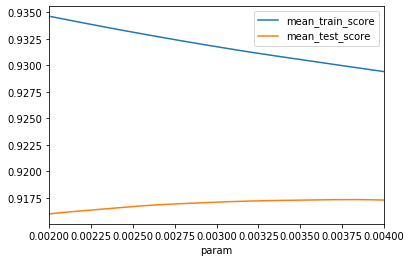

In [48]:
lasso_vis_df.plot(x = 'param', y = ['mean_train_score', 'mean_test_score'])

In [49]:
best_alpha = lasso_param_search2.best_estimator_.get_params()['alpha']

In [60]:
y_predict = np.expm1(lasso_param_search2.predict(X_test.loc[:,X_test.columns != 'Id']))

submission = pd.DataFrame({'Id': X_test['Id'], 'SalePrice': y_predict})
submission

submission.to_csv('submission_lasso.csv',index=False)